In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import math
import seaborn as sns

def find_csv_files_with_glob(path):
    # 使用**递归展开目录，查找所有.csv文件
    csv_files = glob.glob(os.path.join(path, '**', '*.csv'), recursive=True)
    return csv_files

directory_path = r'D:\human_data'
csv_paths = find_csv_files_with_glob(directory_path)

# for one_csv_path in csv_paths:
print(csv_paths[0])
csv=pd.read_csv(csv_paths[0])
csv.keys()

D:\human_data\2024.10.18\oct1801_test3_2024-10-18_13h24.30.689.csv


Index(['thisN', 'thisTrialN', 'thisRepN', 'mouse_2.x', 'mouse_2.y',
       'mouse_2.leftButton', 'mouse_2.midButton', 'mouse_2.rightButton',
       'mouse_2.time', 'mouse_2.clicked_name',
       ...
       'end.started', 'end.stopped', 'participant', 'session', 'date',
       'expName', 'psychopyVersion', 'frameRate', 'expStart', 'Unnamed: 166'],
      dtype='object', length=167)

## 画每个被试思考时间和分数的对应

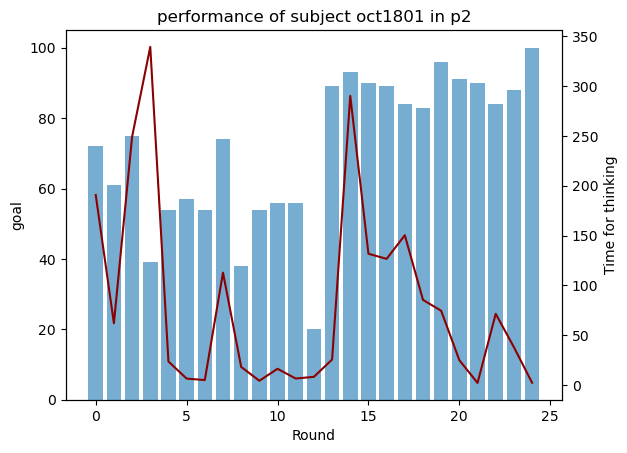

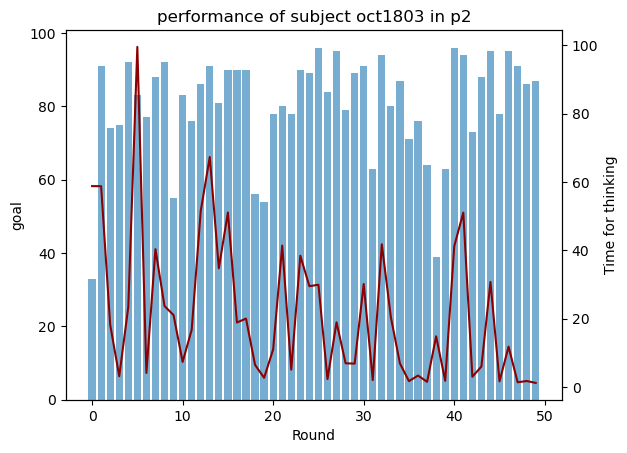

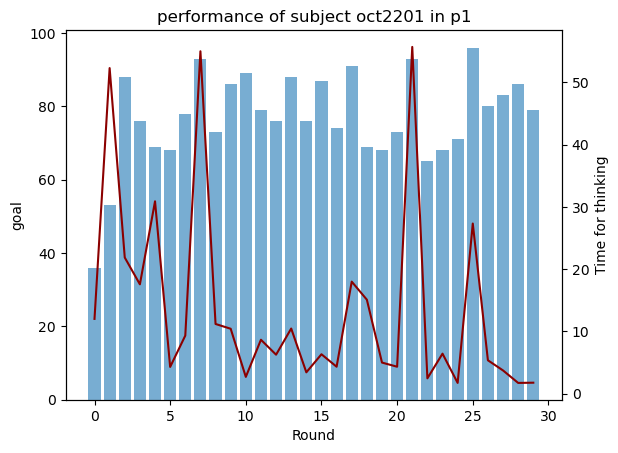

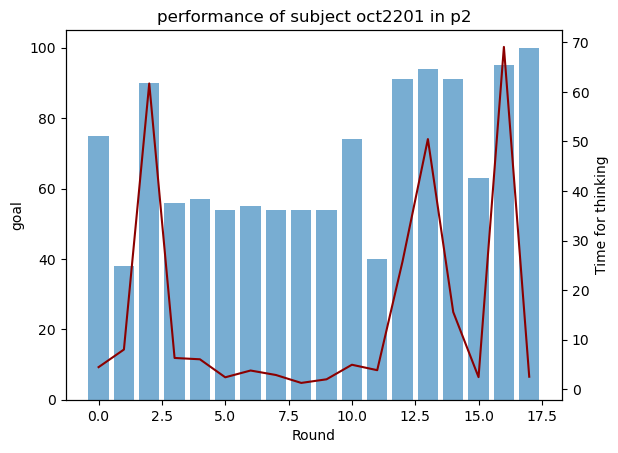

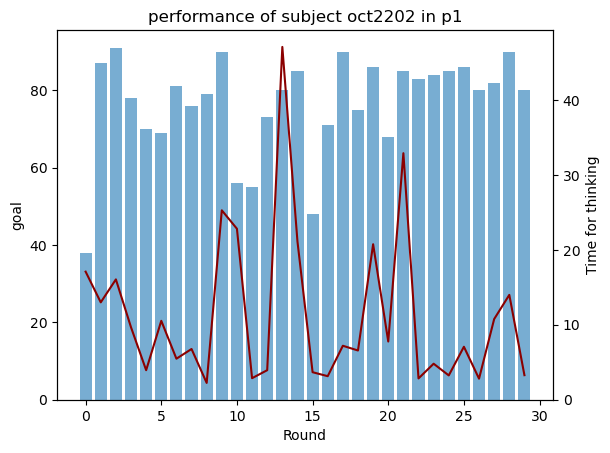

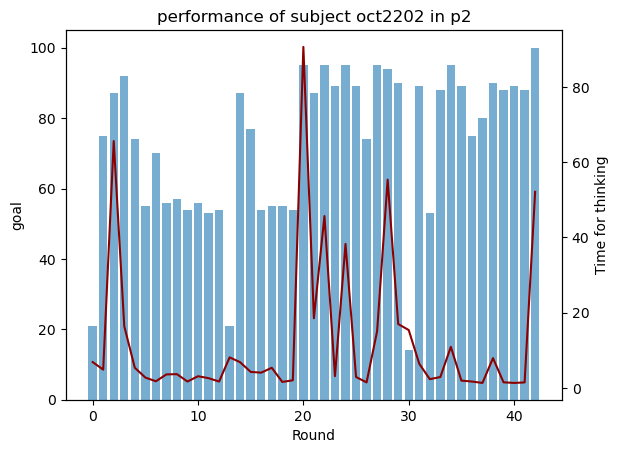

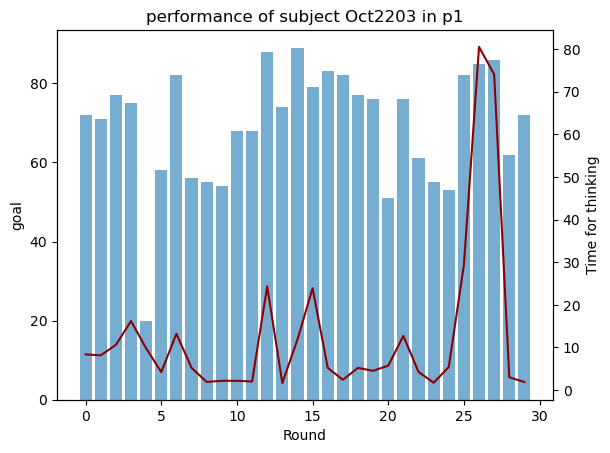

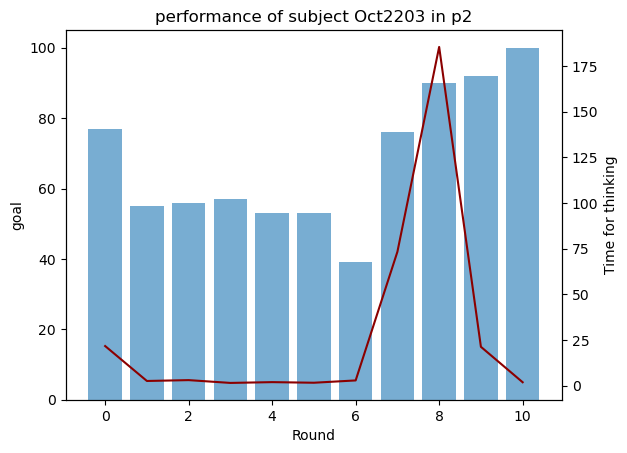

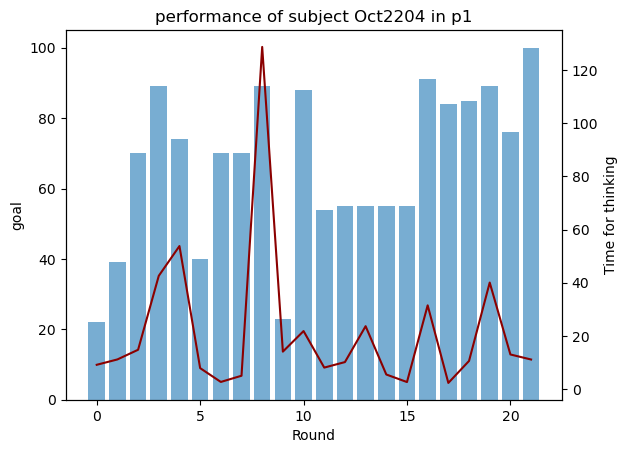

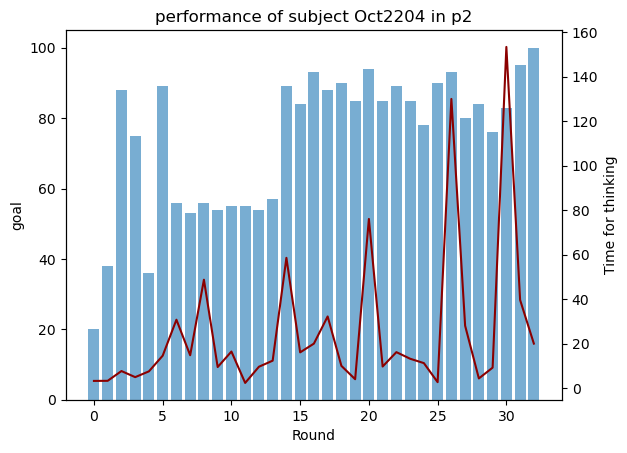

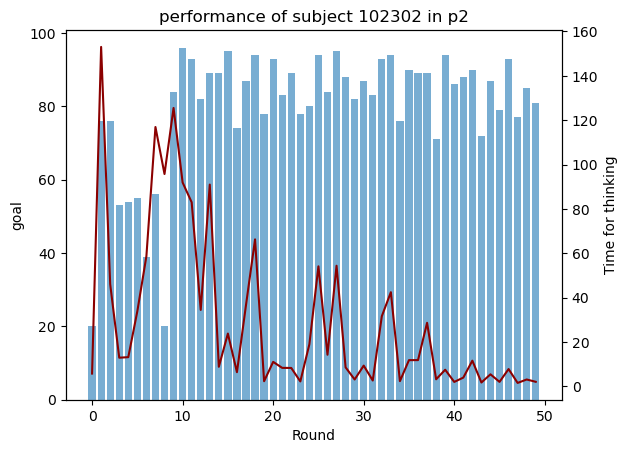

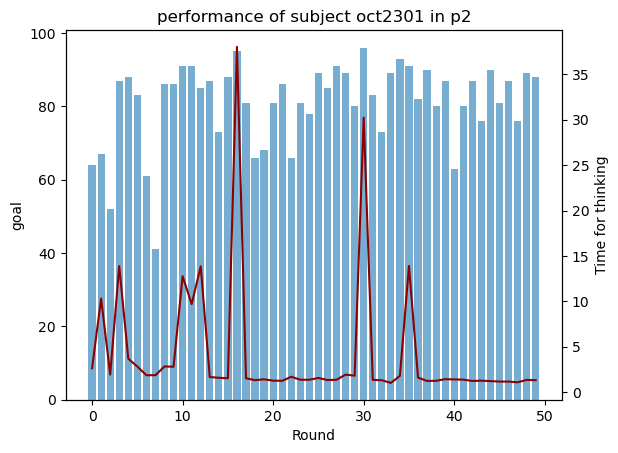

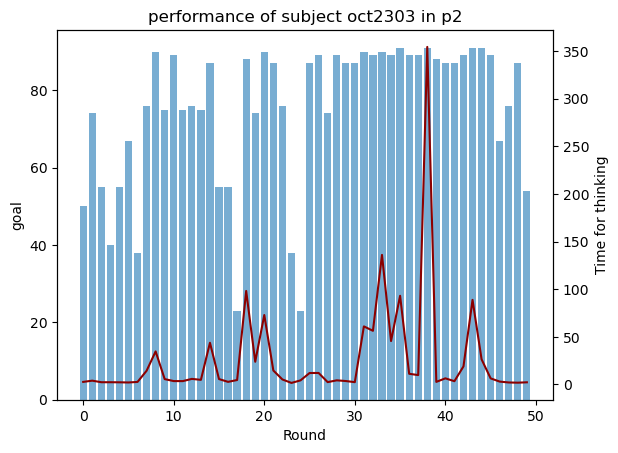

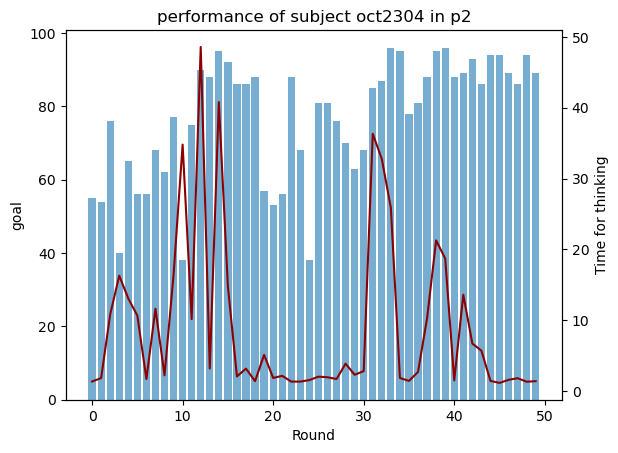

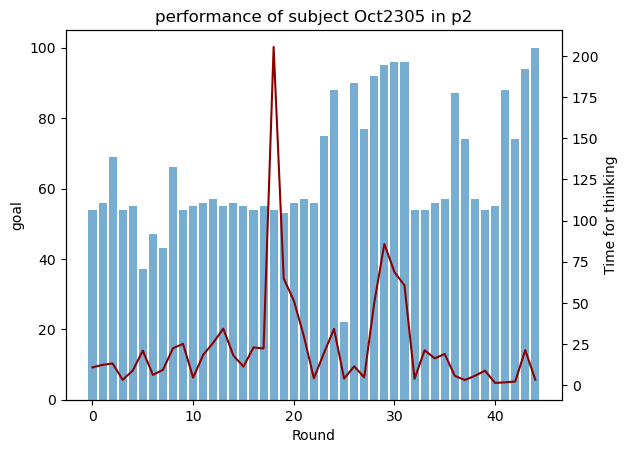

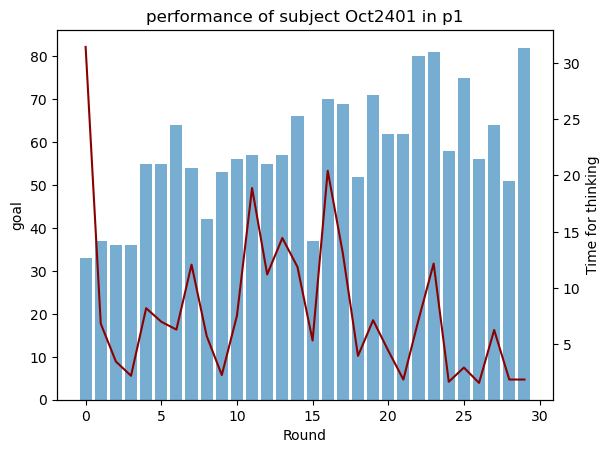

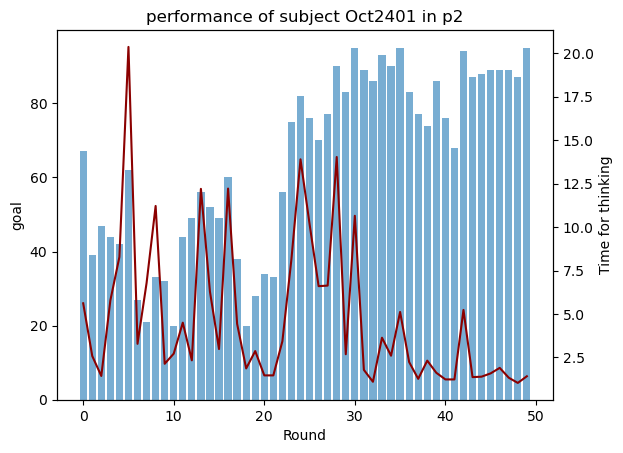

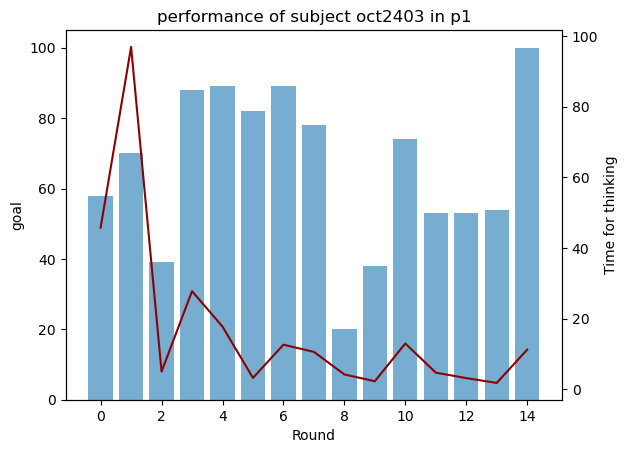

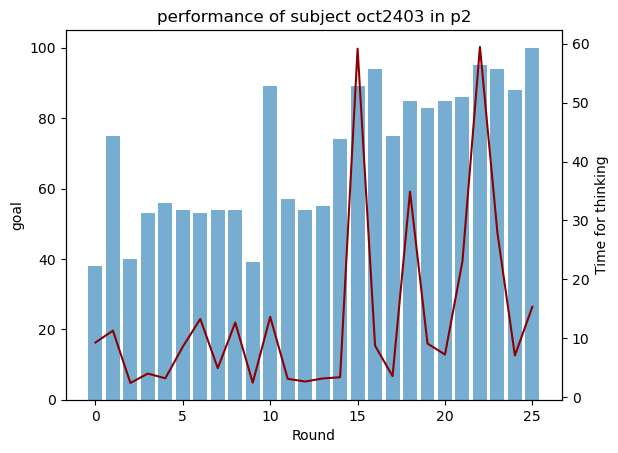

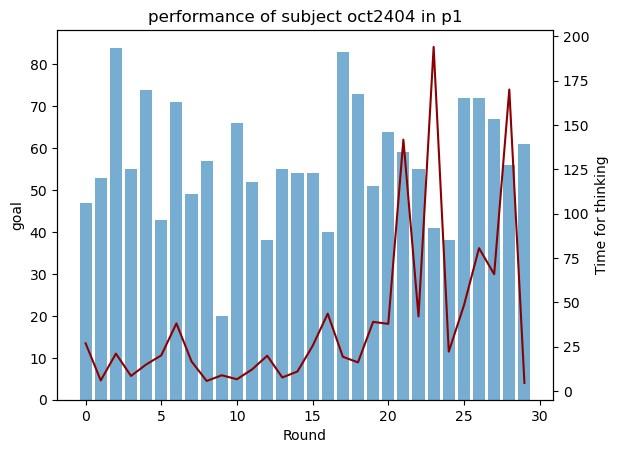

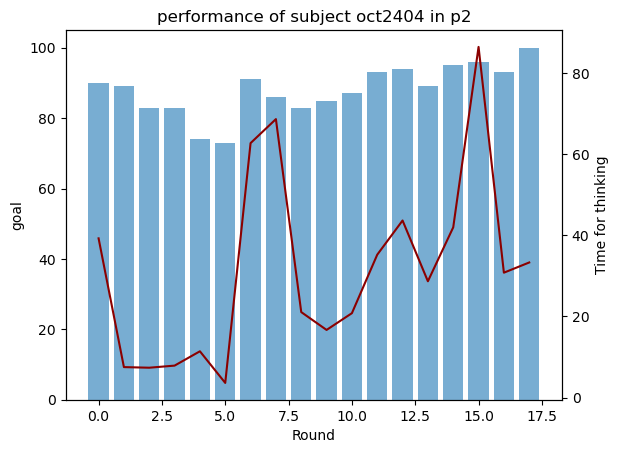

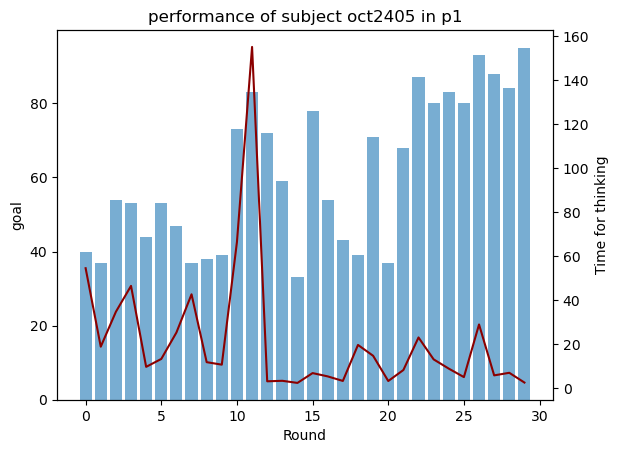

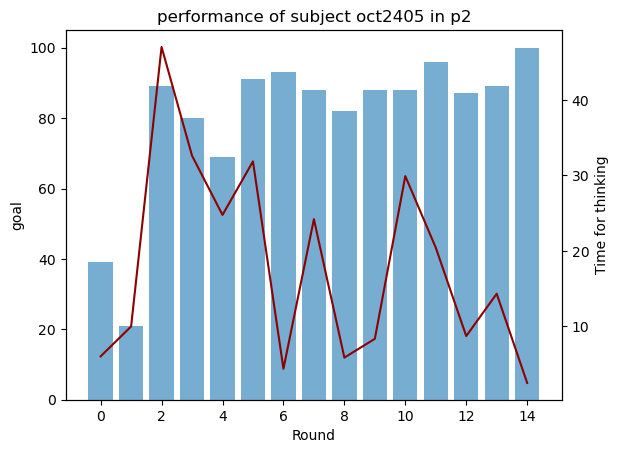

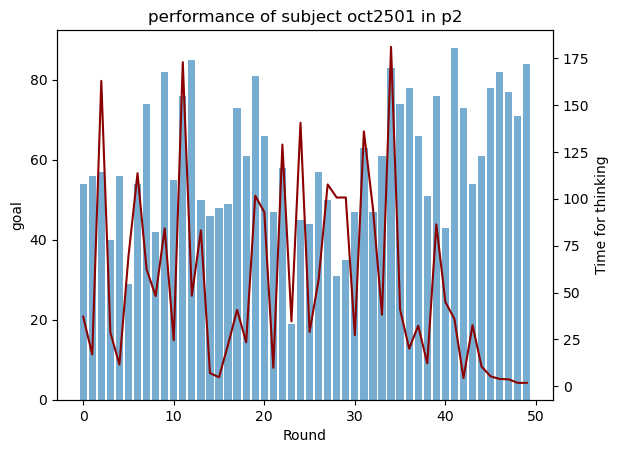

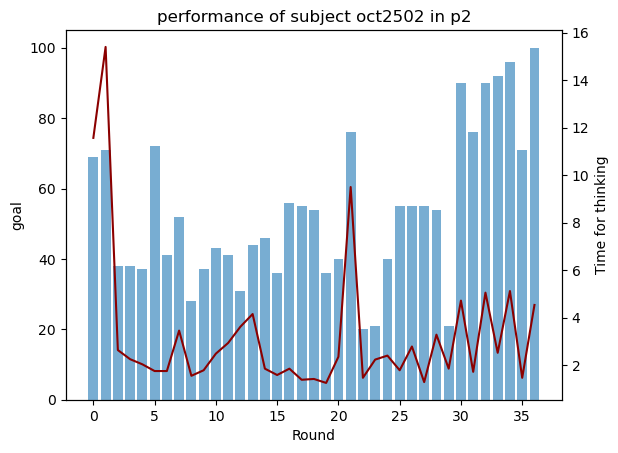

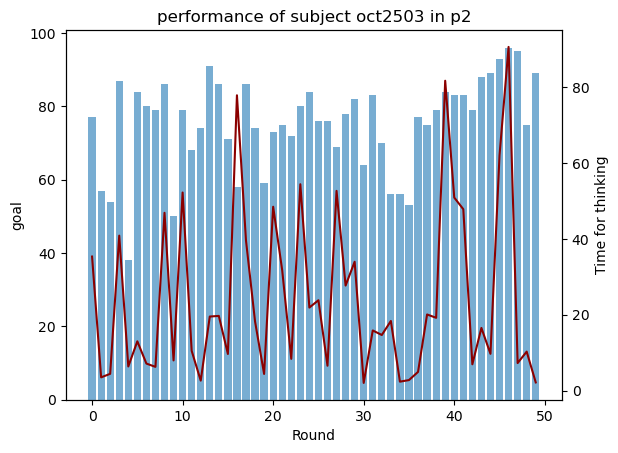

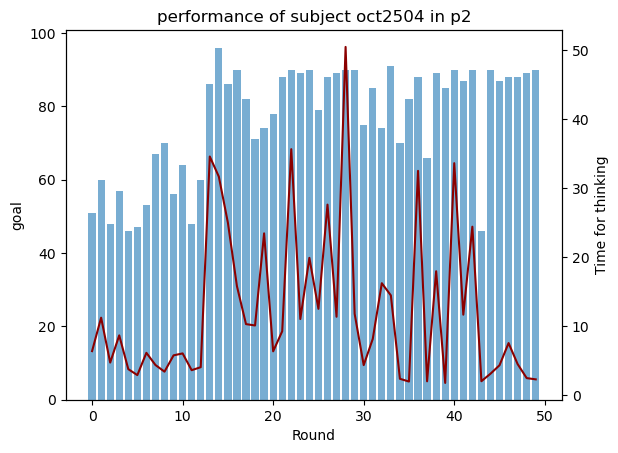

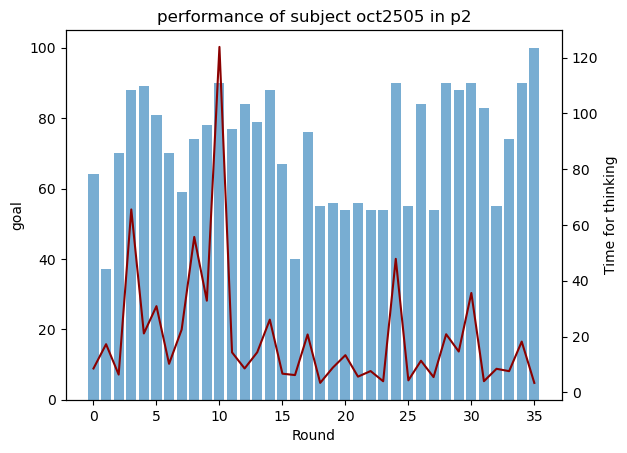

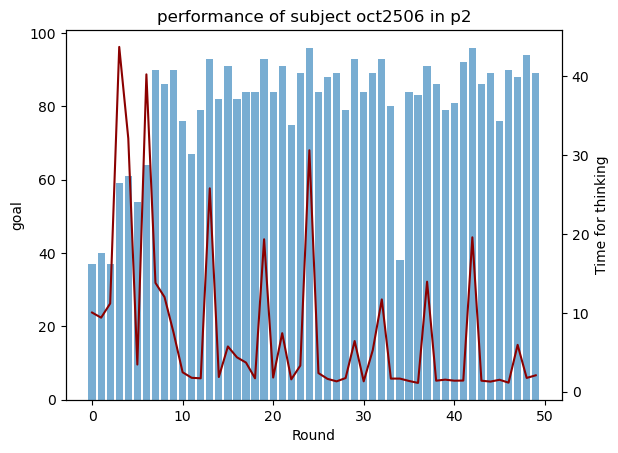

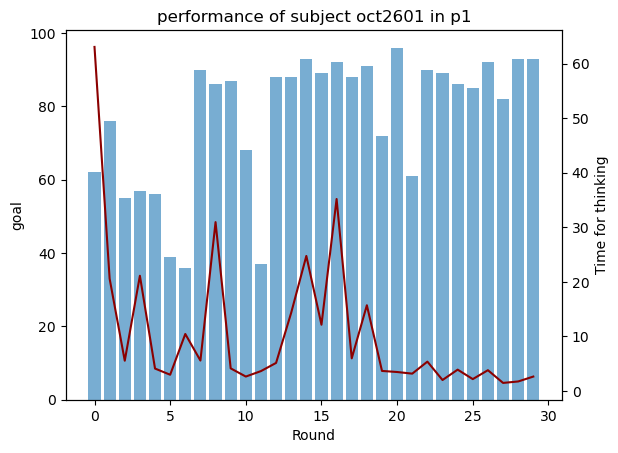

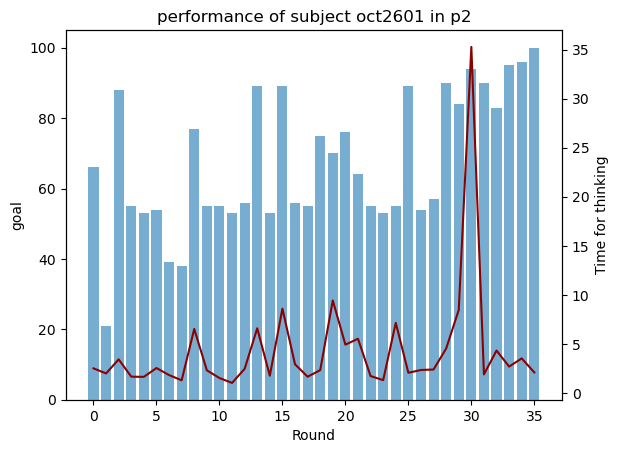

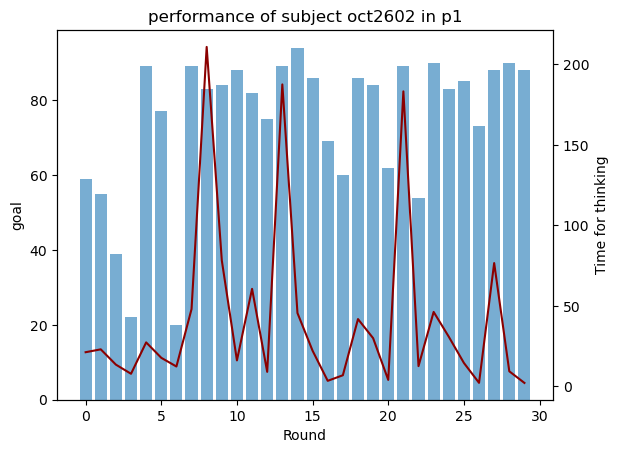

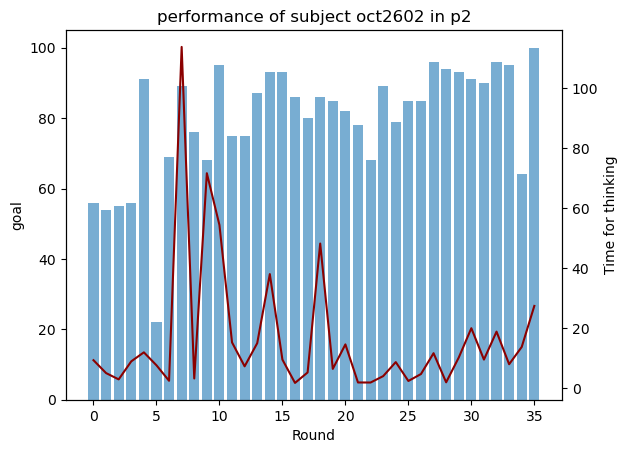

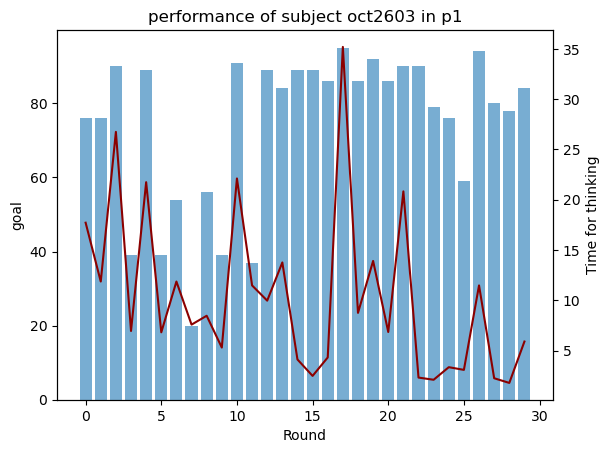

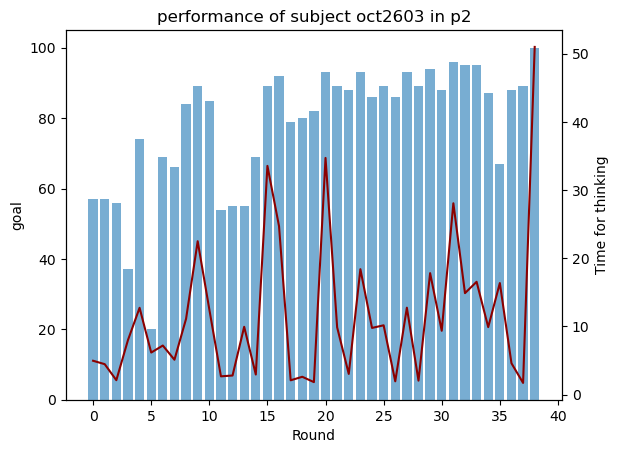

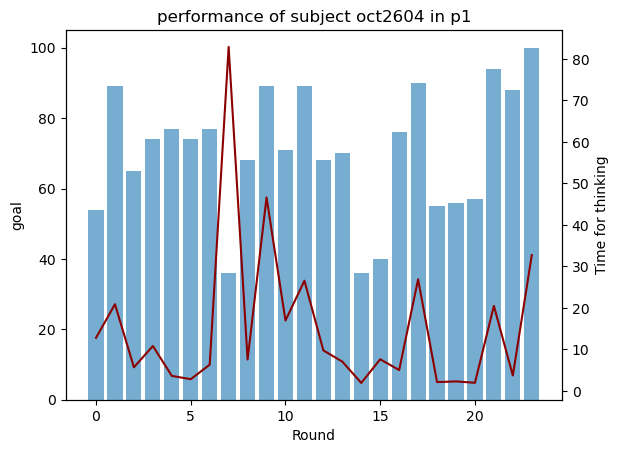

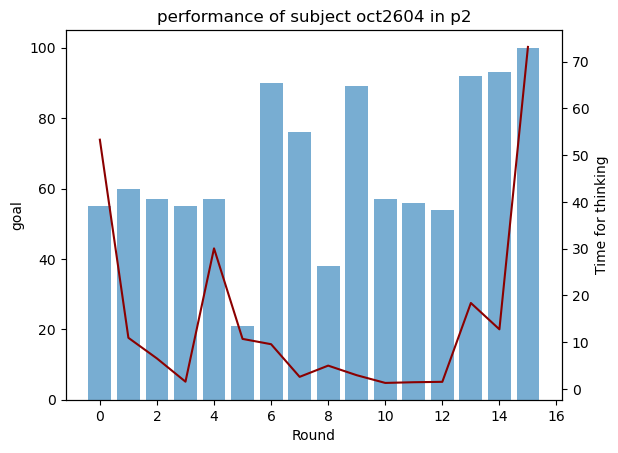

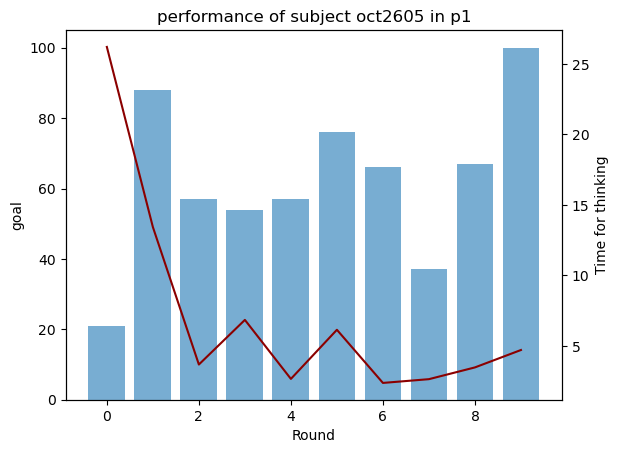

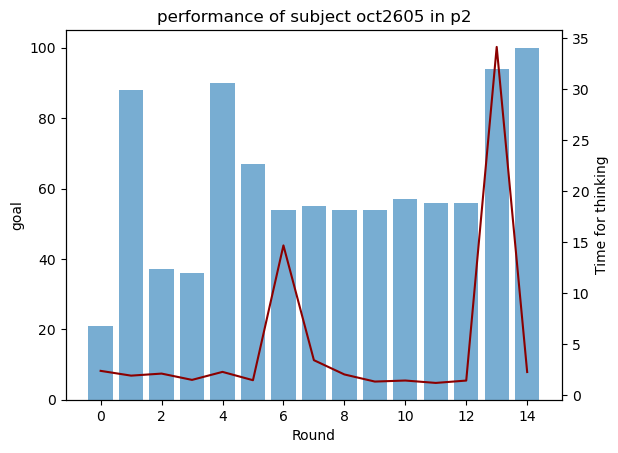

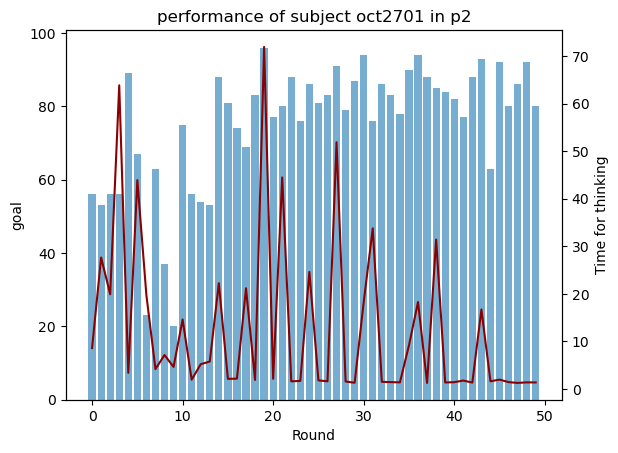

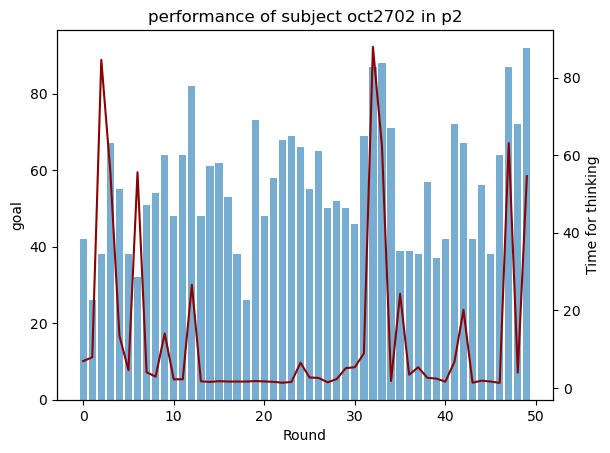

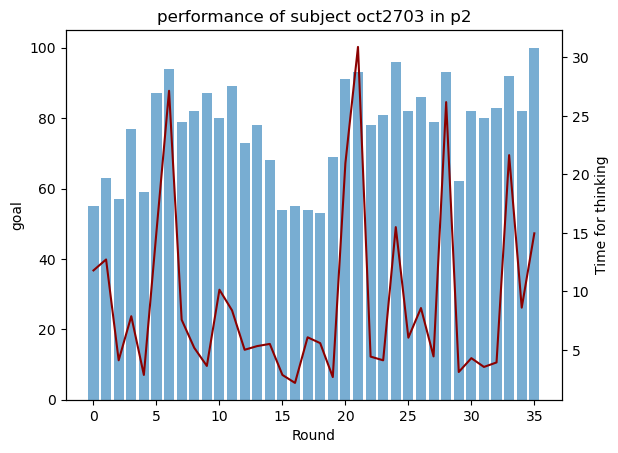

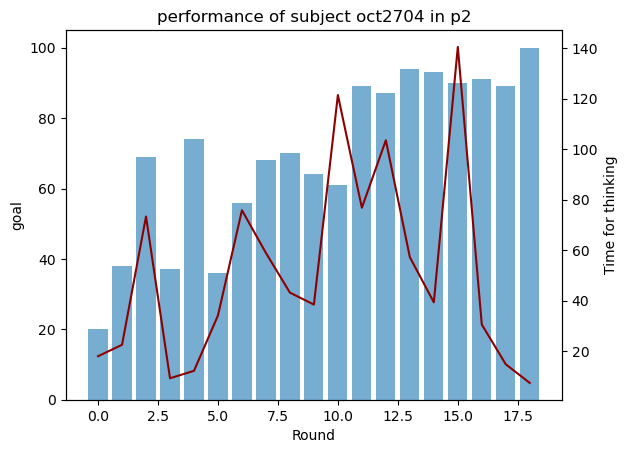

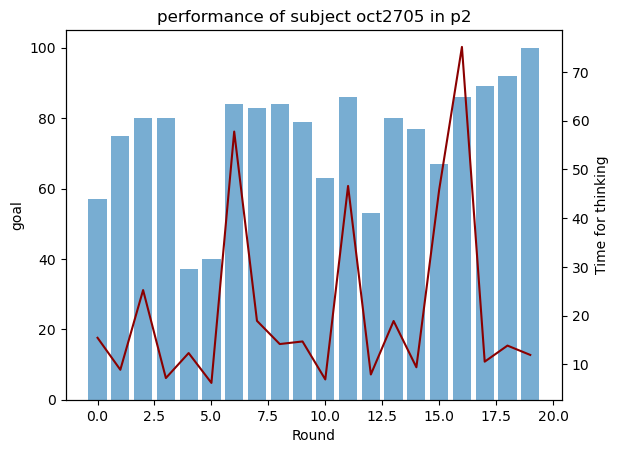

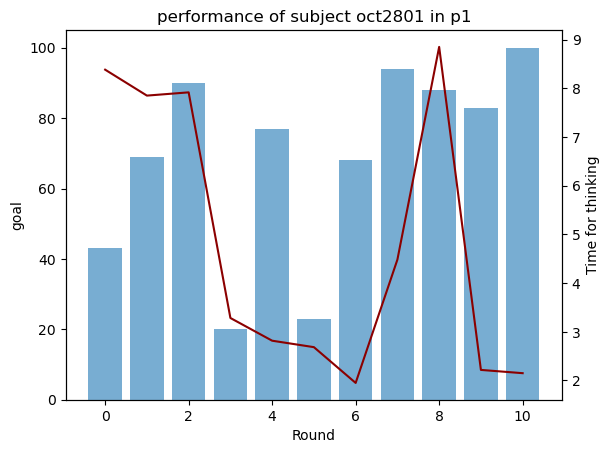

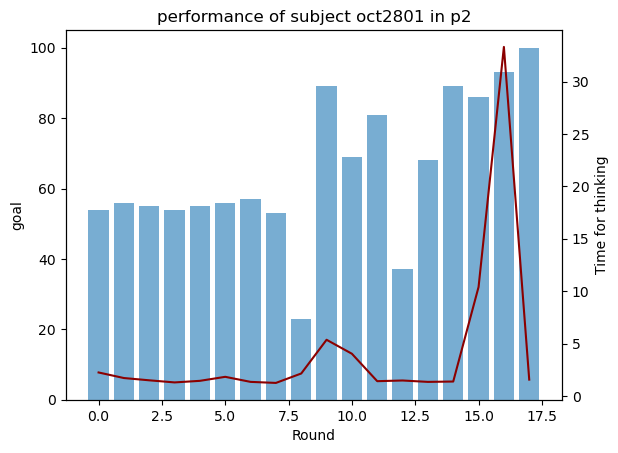

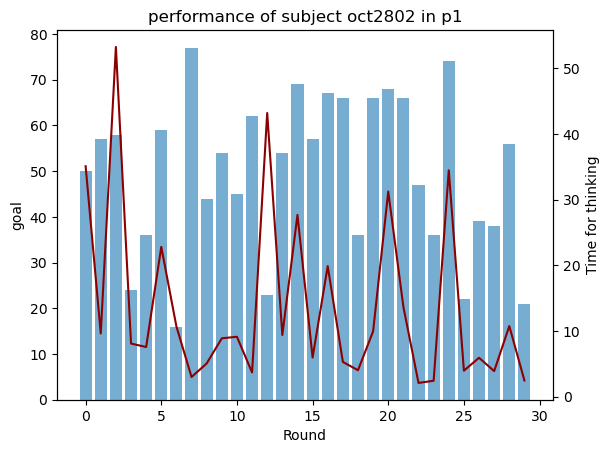

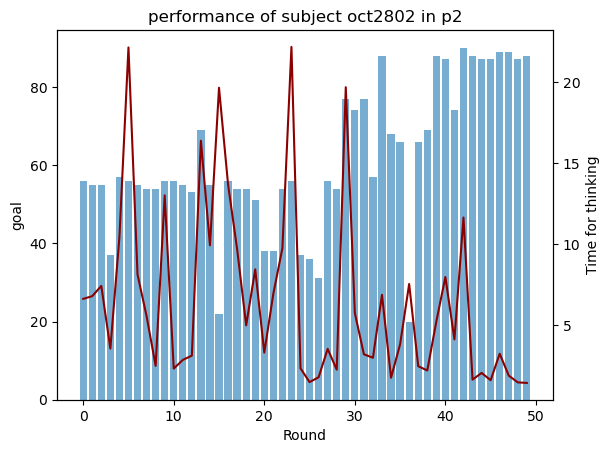

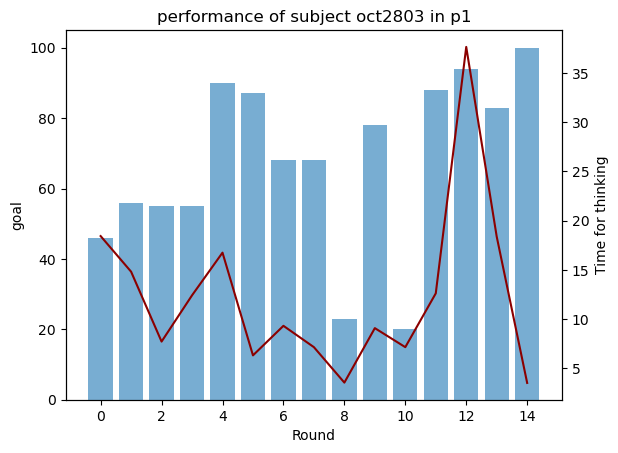

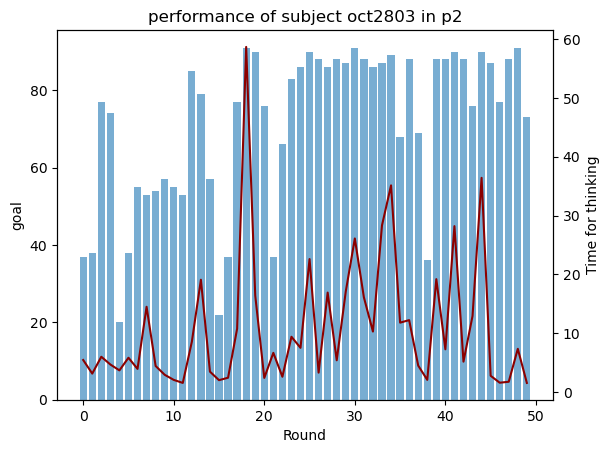

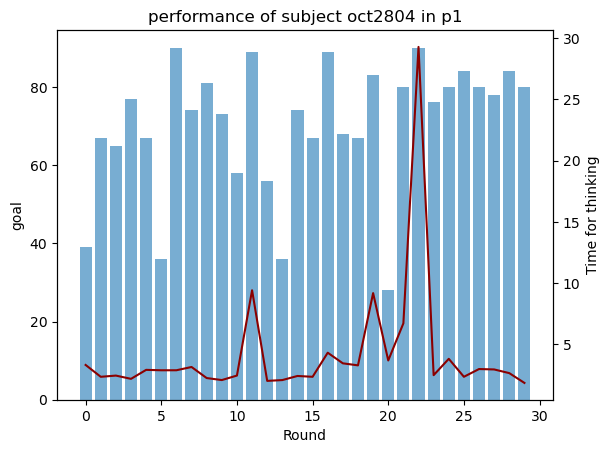

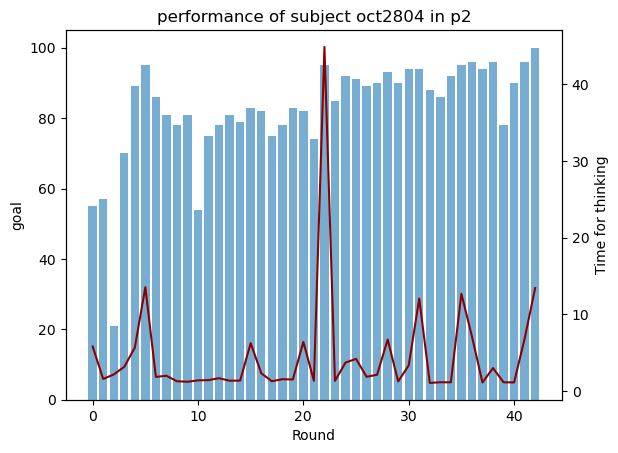

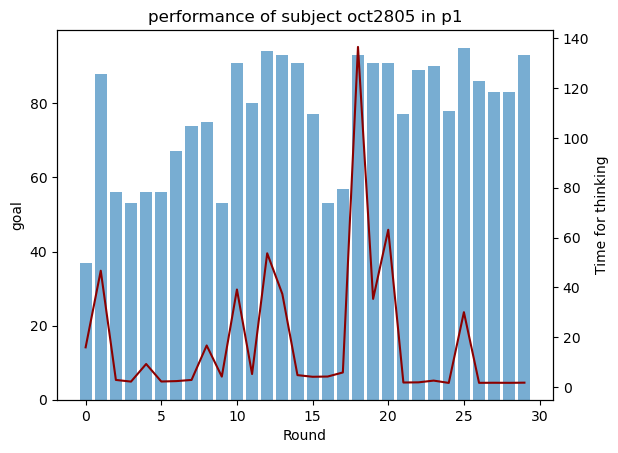

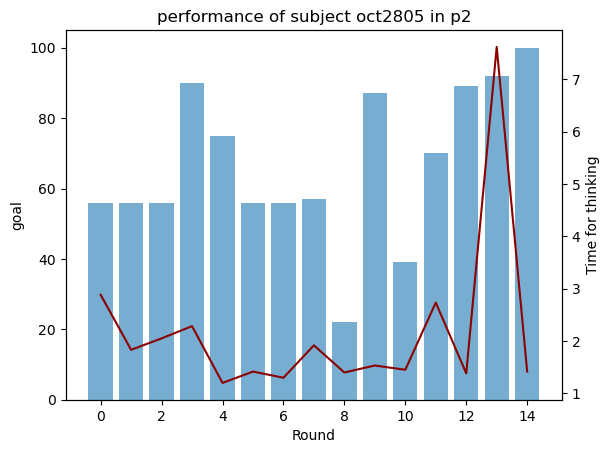

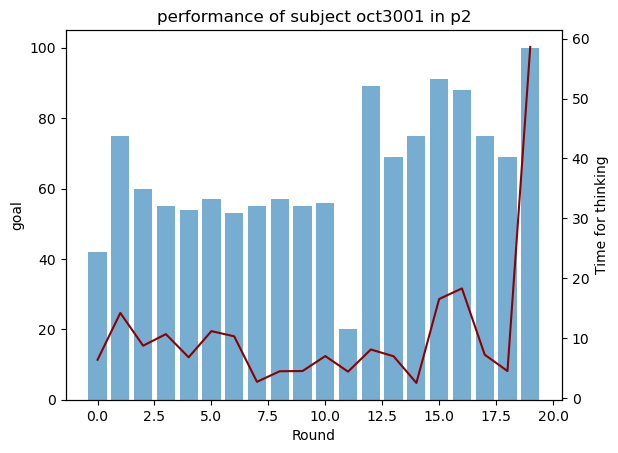

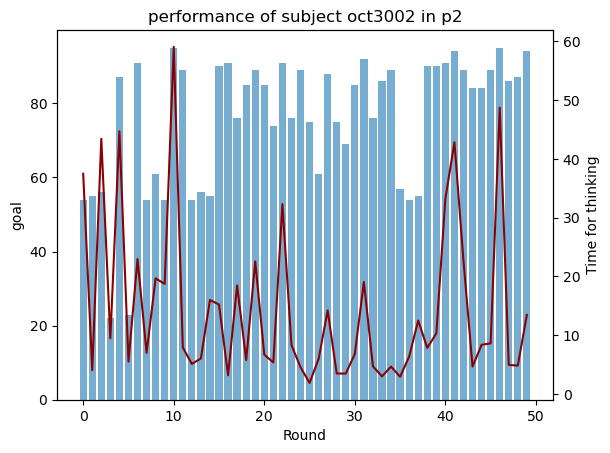

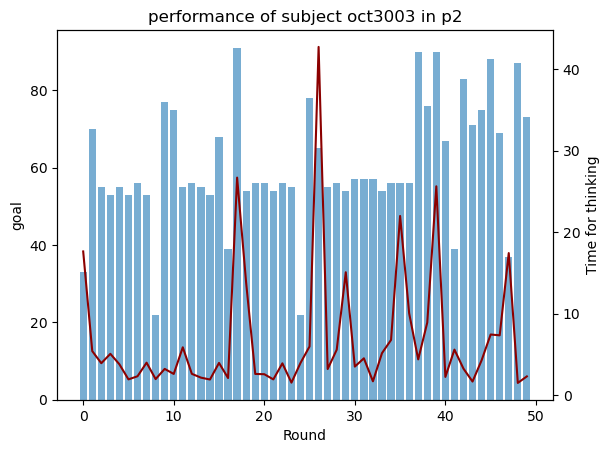

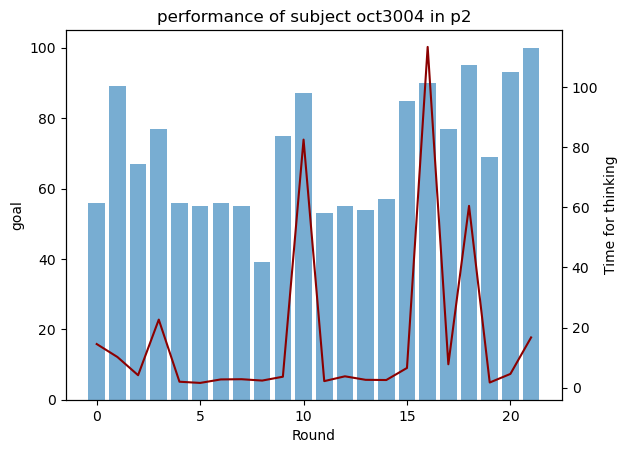

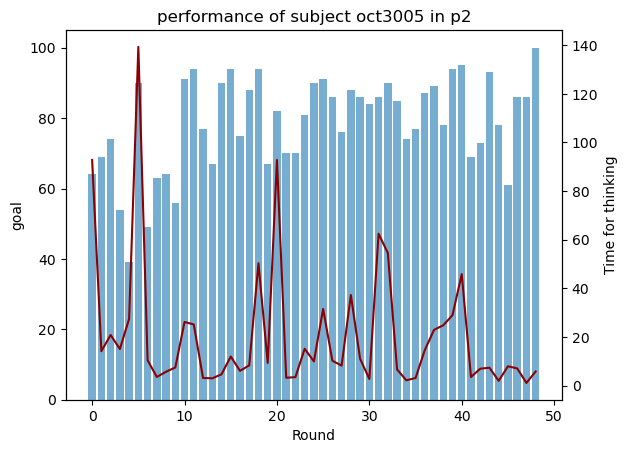

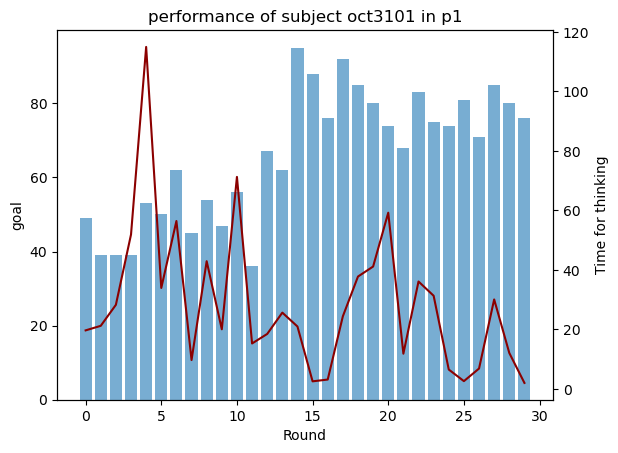

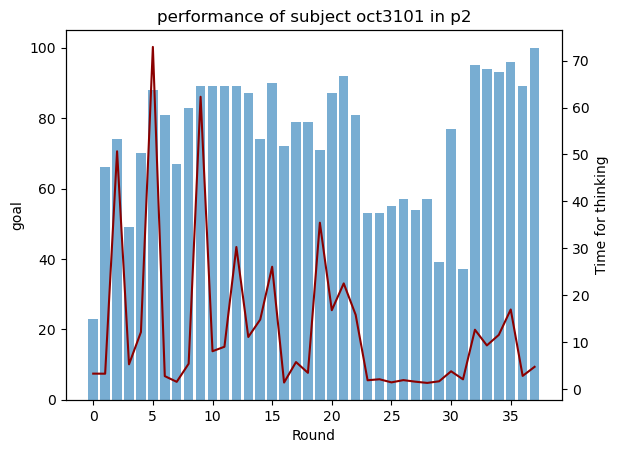

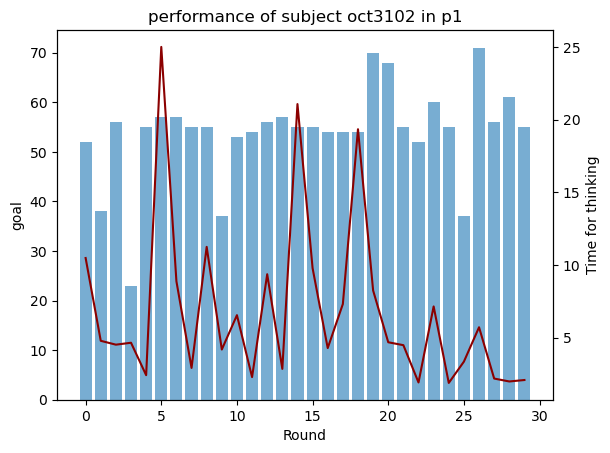

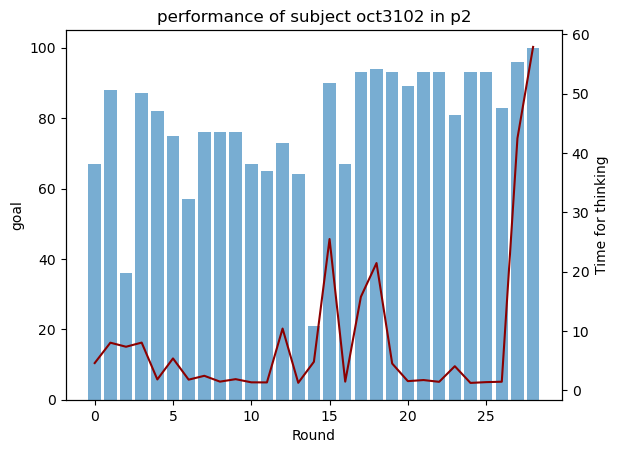

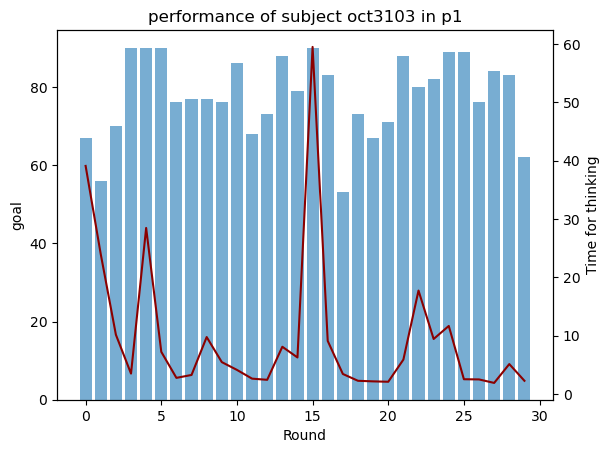

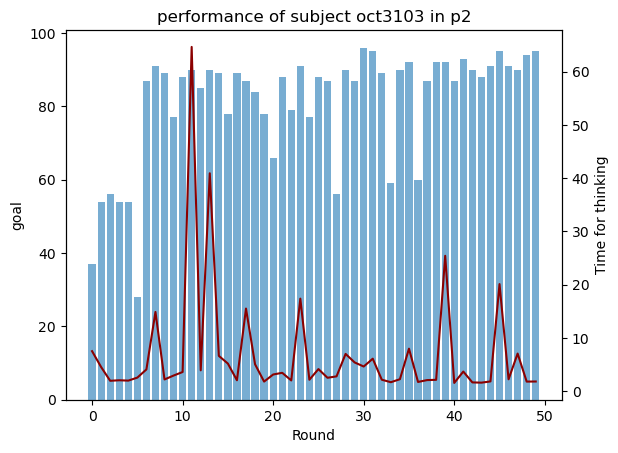

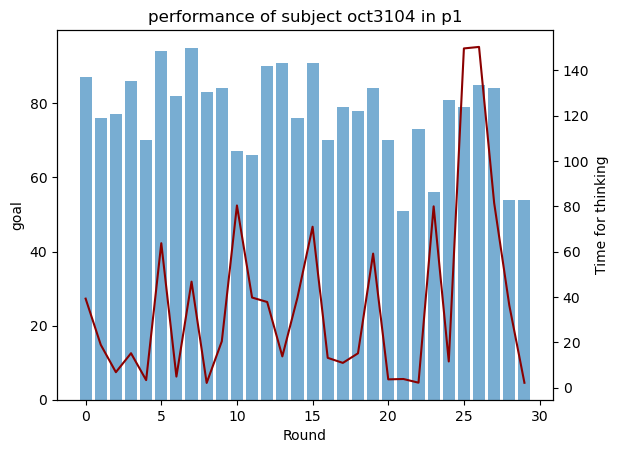

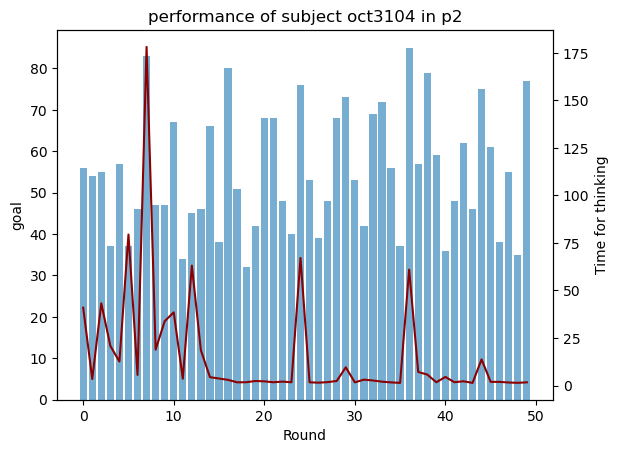

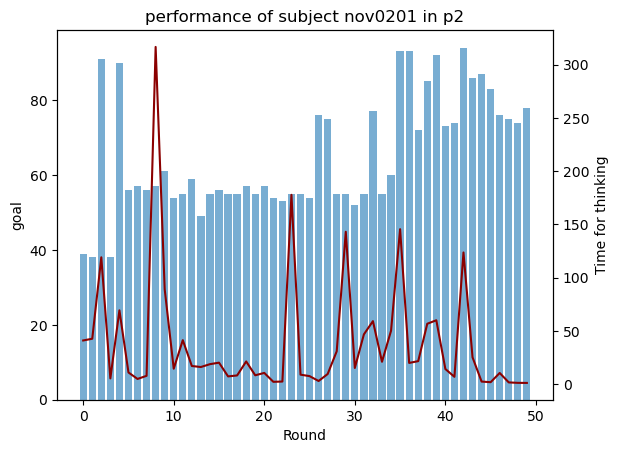

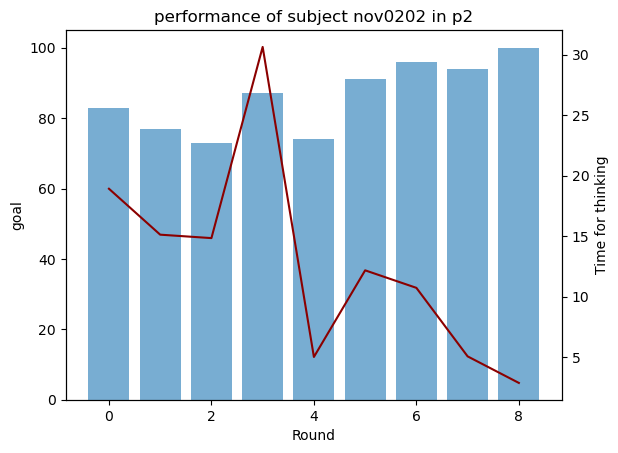

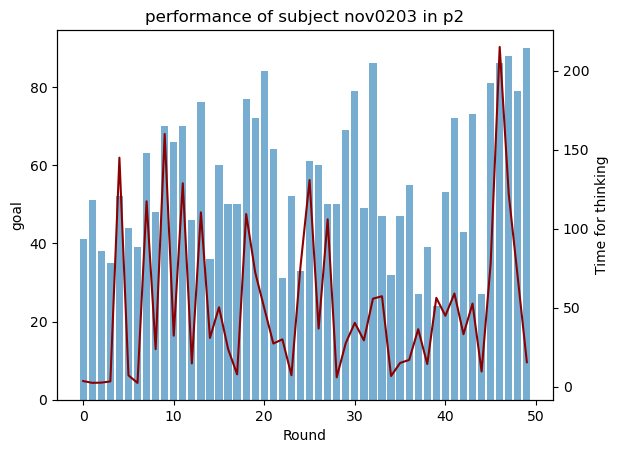

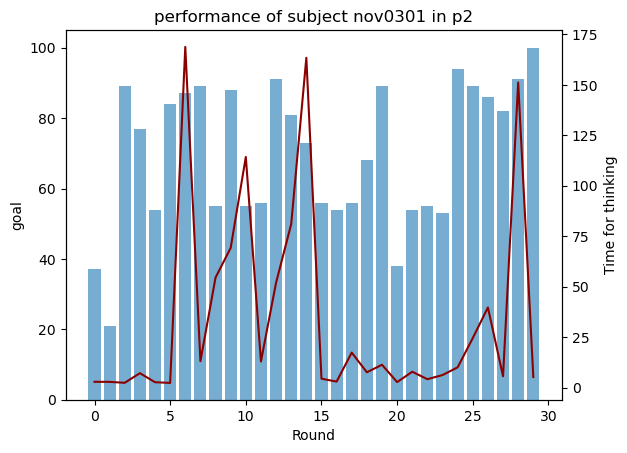

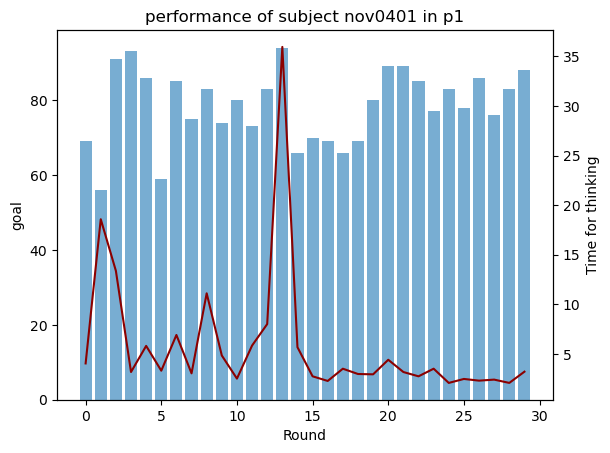

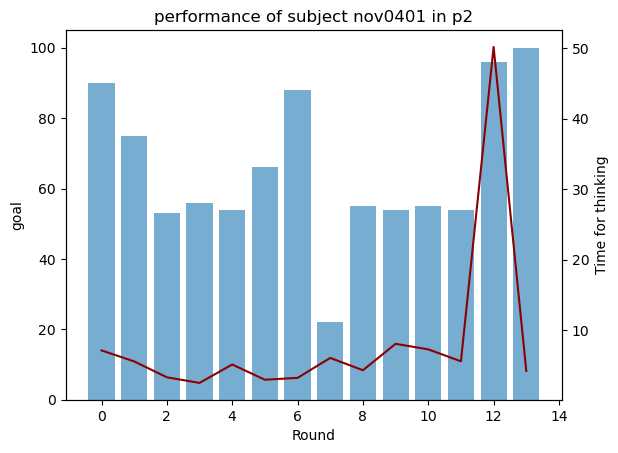

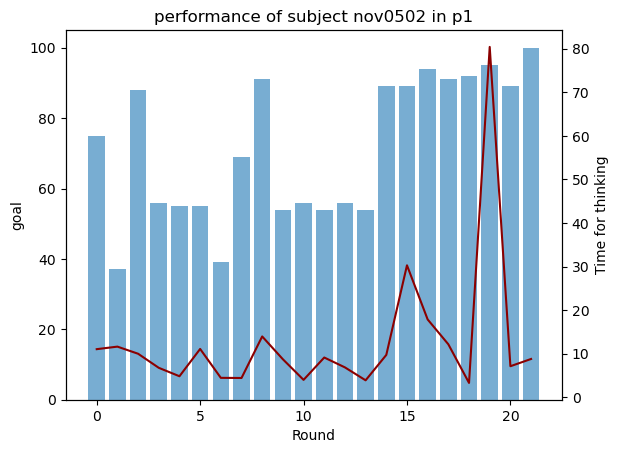

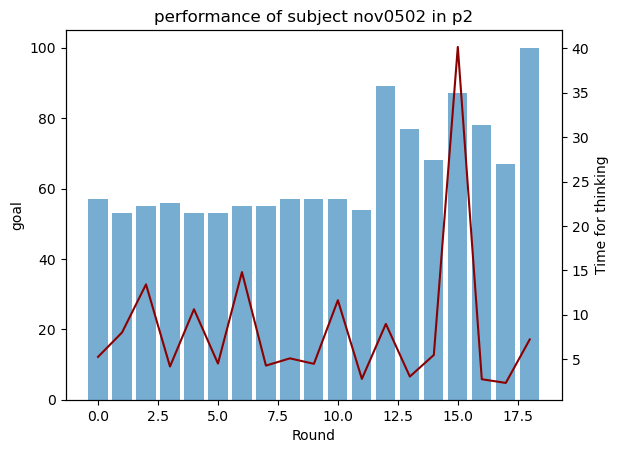

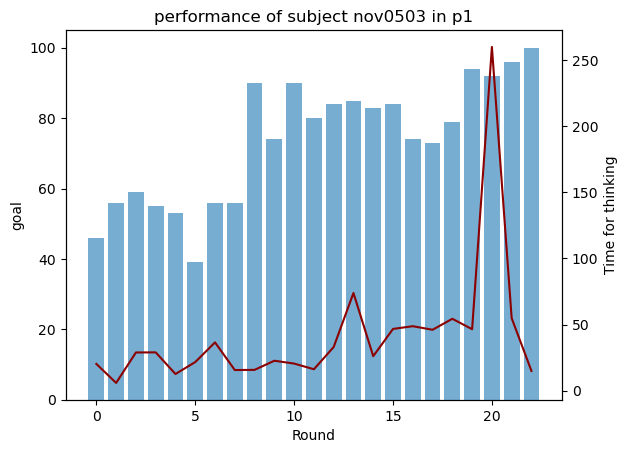

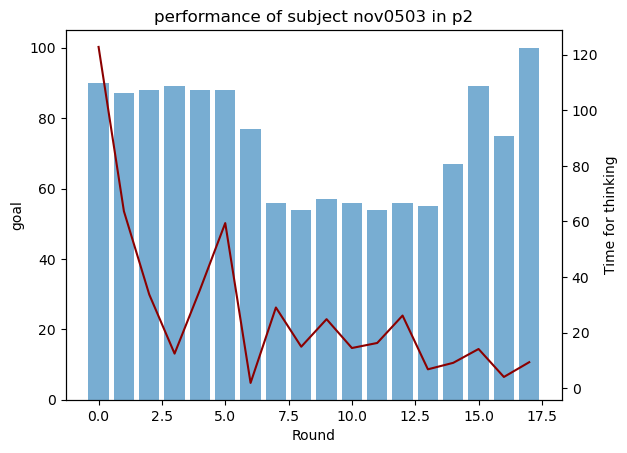

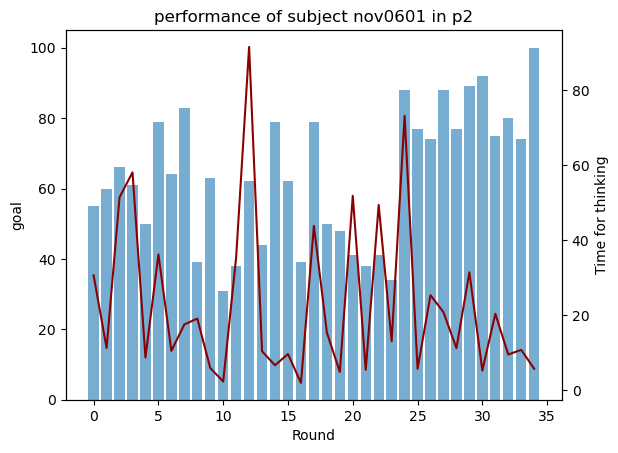

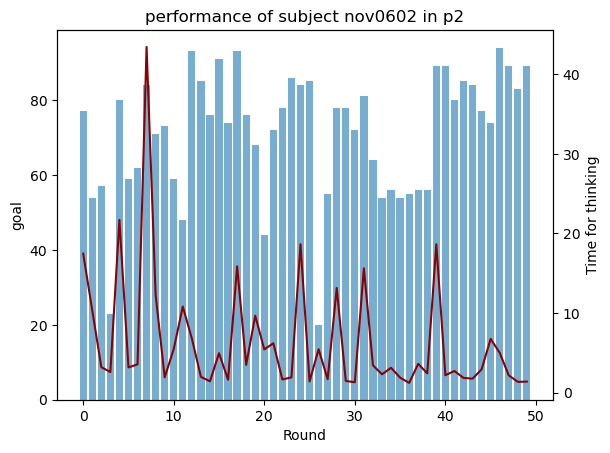

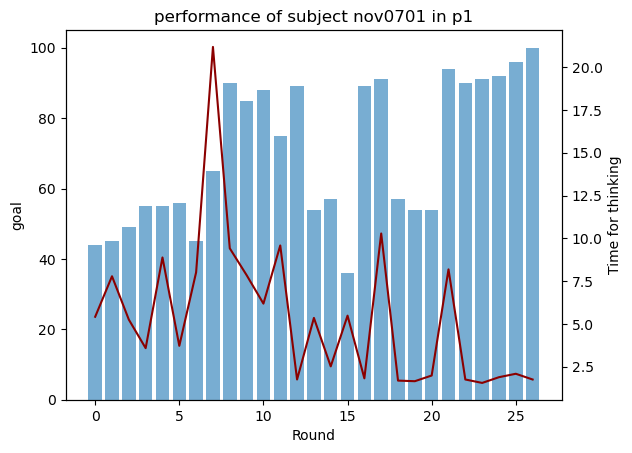

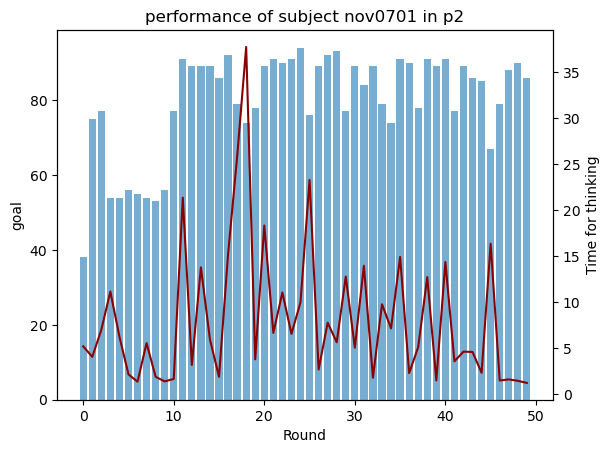

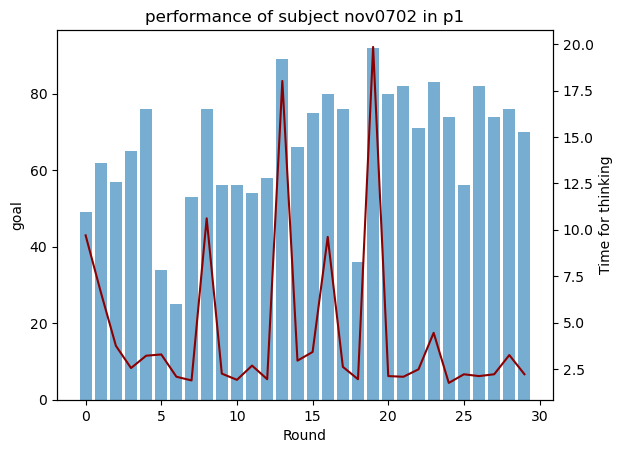

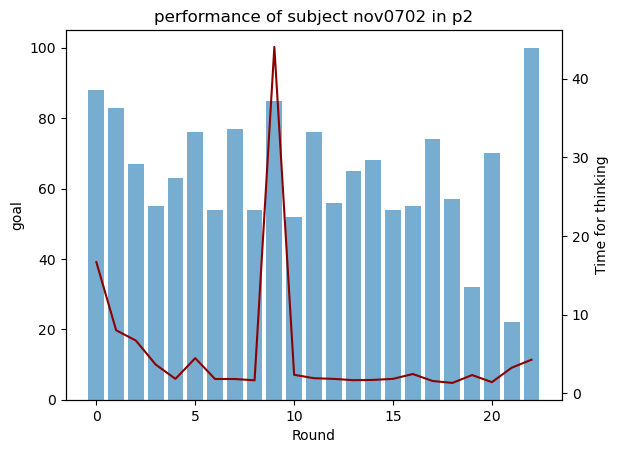

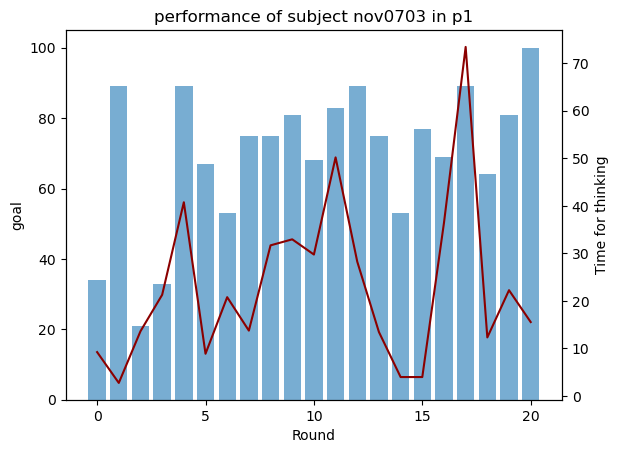

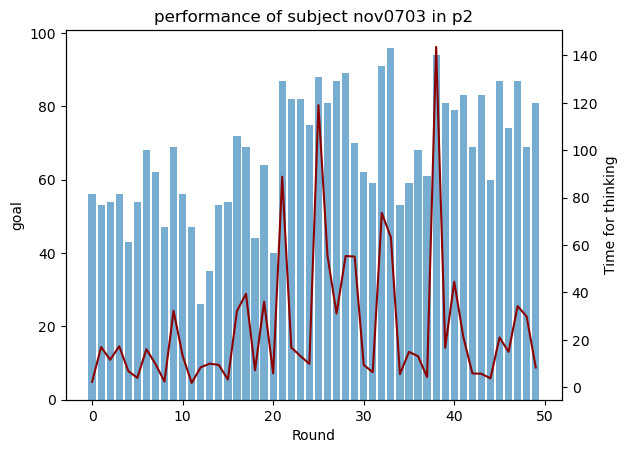

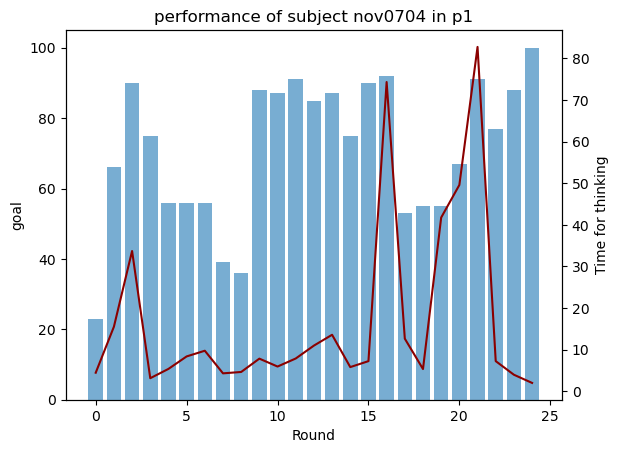

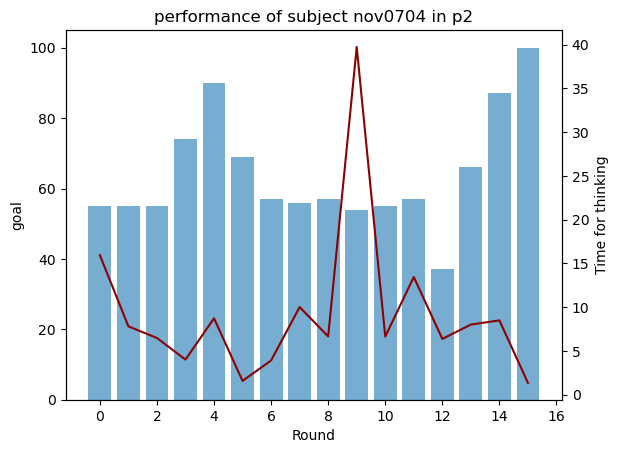

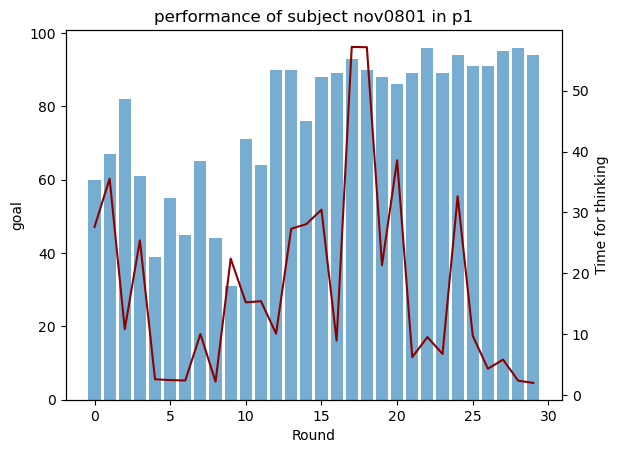

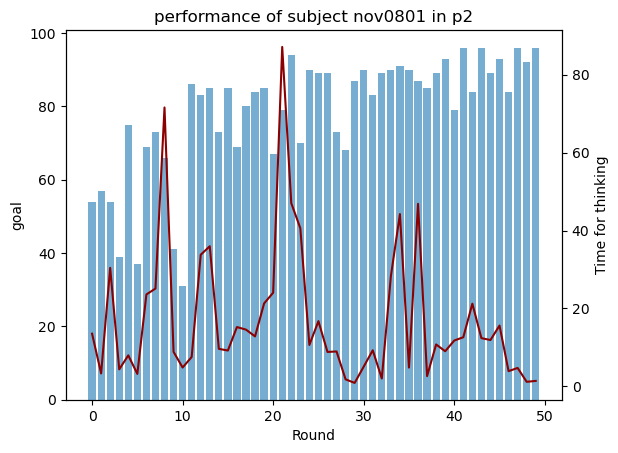

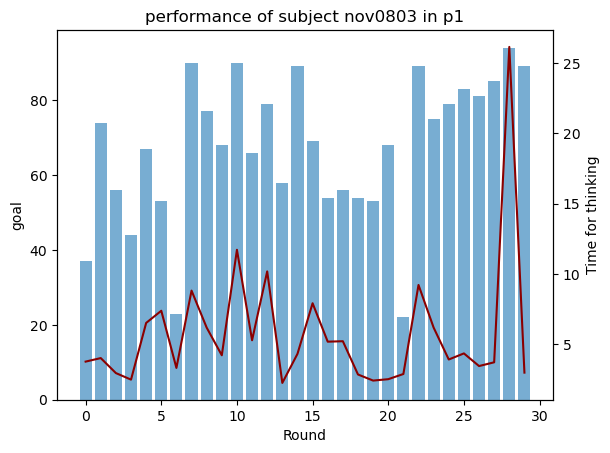

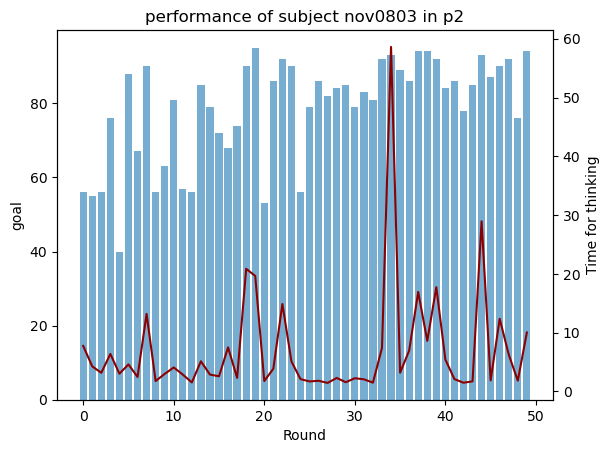

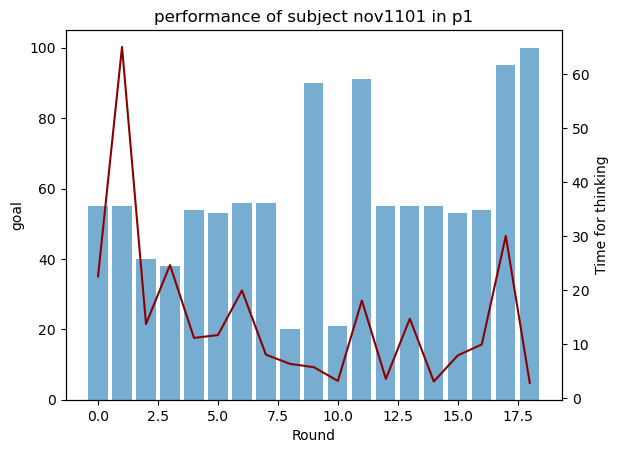

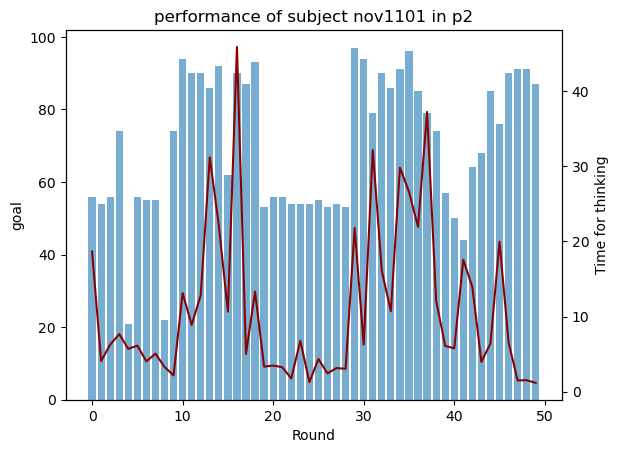

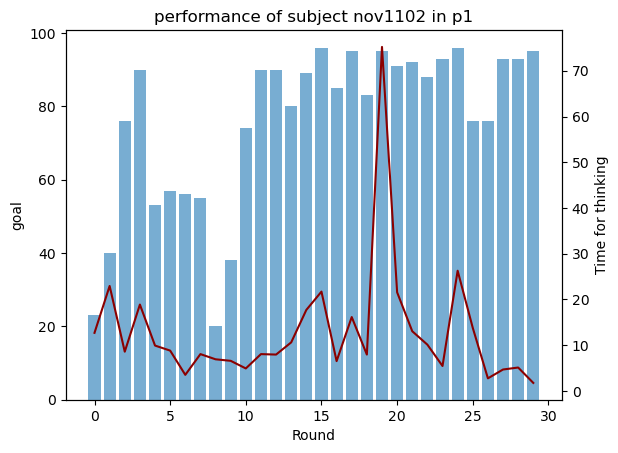

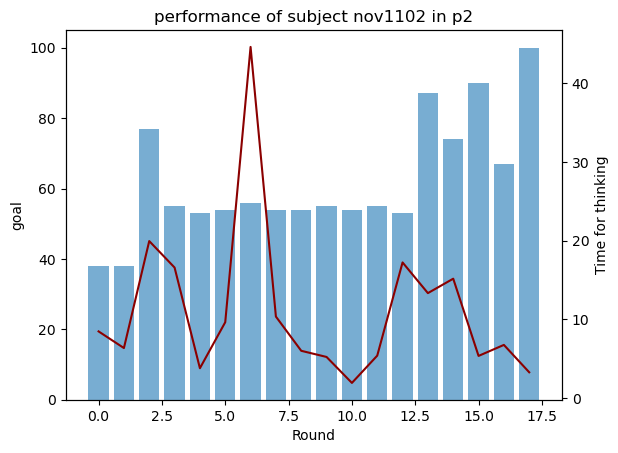

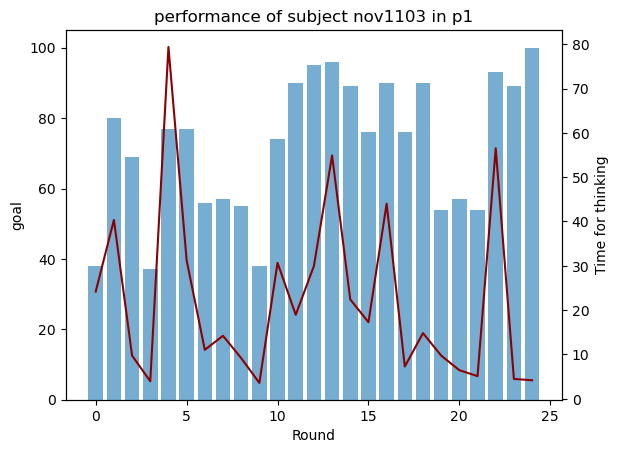

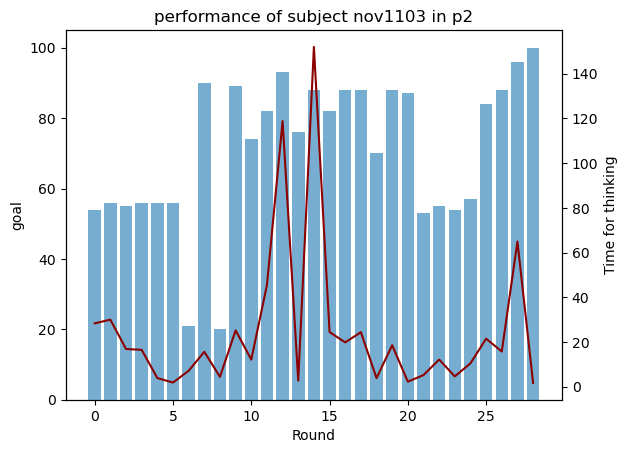

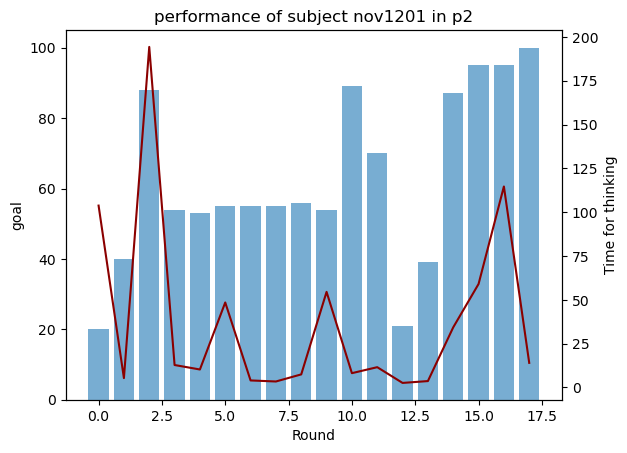

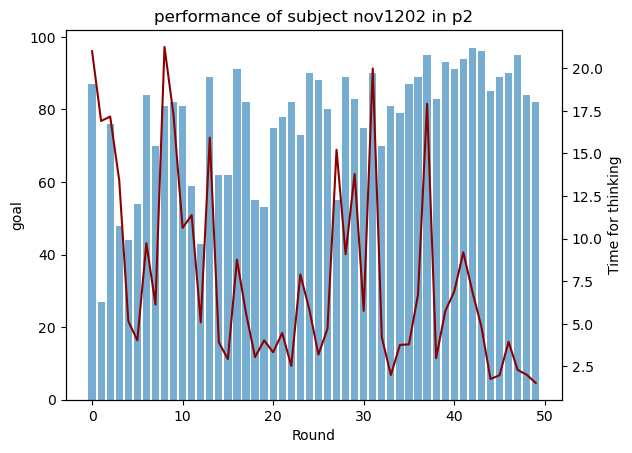

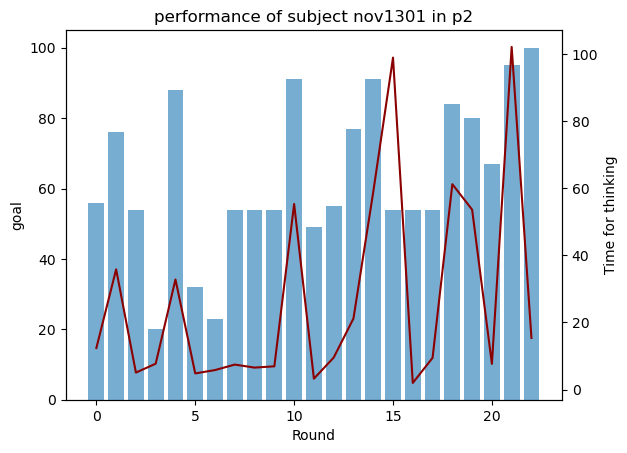

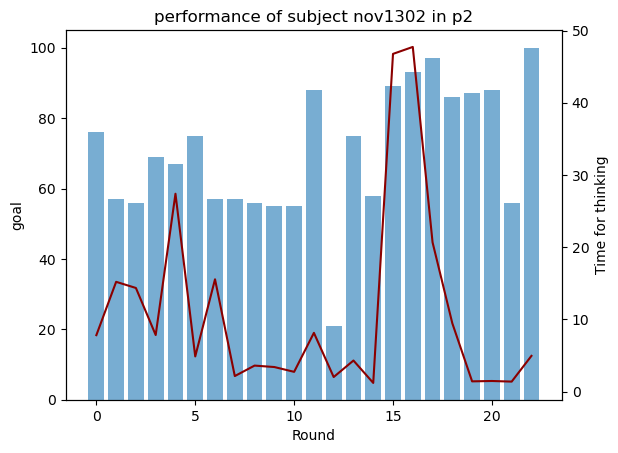

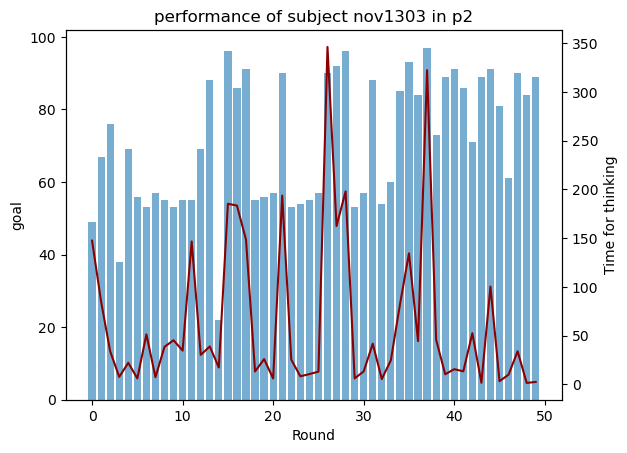

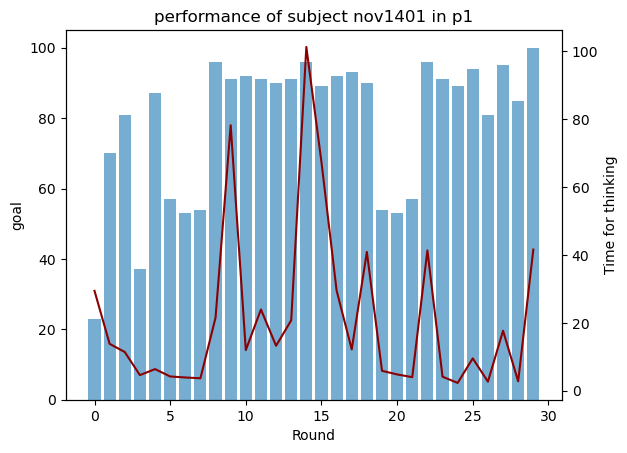

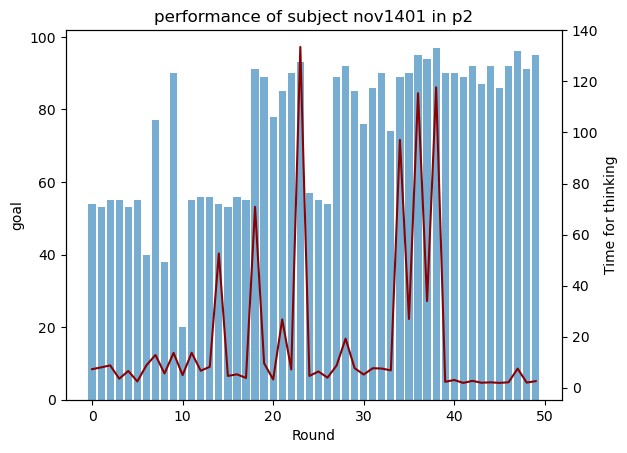

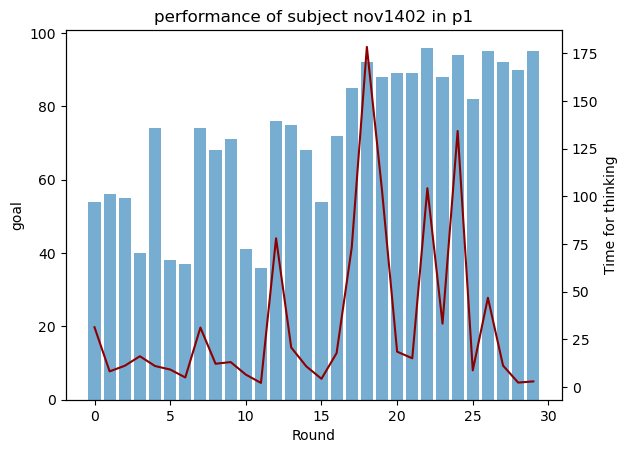

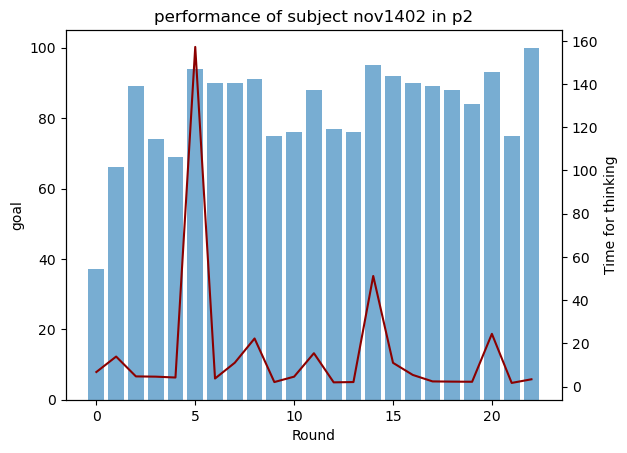

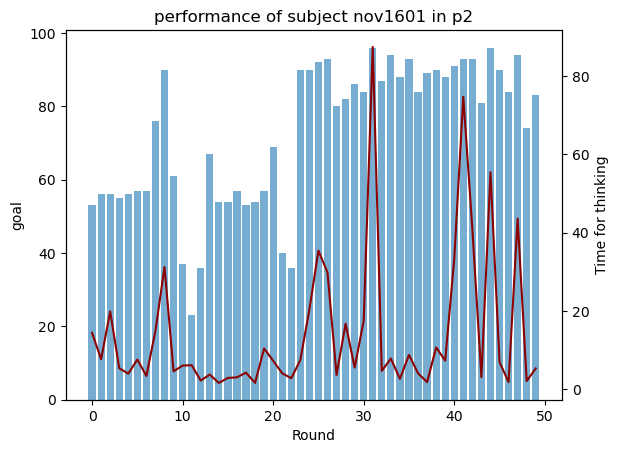

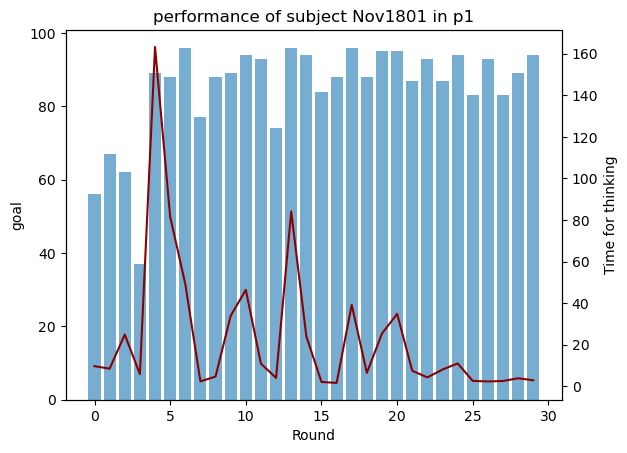

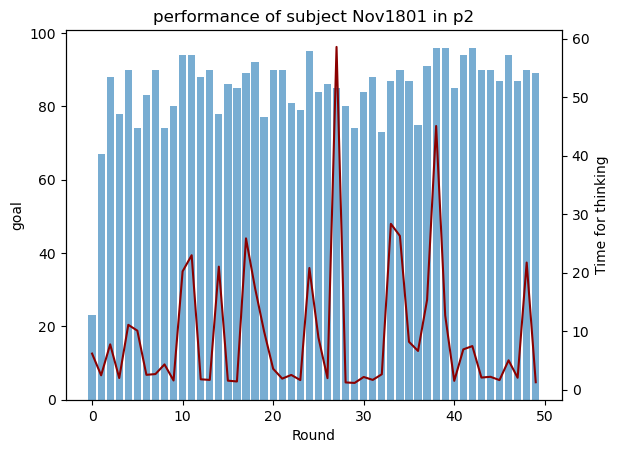

In [5]:
#这个是画每个被试思考时间的
def draw_thinking_time_and_goal(save_in_folder,subject_id,phase,p1_reward,p2_reward,p1_timegap,p2_timegap):
    # 创建图形和第一个 y 轴
    if phase == 3:
        fig, ax1 = plt.subplots()

        ax1.set_xlabel('Round')
        ax1.set_ylabel('goal')
        ax1.bar(range(len(p1_reward)), p1_reward,alpha=0.6)

        # 创建第二个 y 轴，共享 x 轴
        ax2 = ax1.twinx()
        ax2.set_ylabel('Time for thinking')

        ax2.plot(range(len(p1_timegap)), p1_timegap,color='#8B0000')


        plt.title(f'performance of subject {subject_id} in p1')
        # save_in_folder = r'D:/thinking_while_known_goal_pic_20241031/'
        save_path = save_in_folder+str(subject_id)+'_p1.png'
#         plt.savefig(save_path, format='png')

    ########################
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Round')
    ax1.set_ylabel('goal')
    ax1.bar(range(len(p2_reward)), p2_reward,alpha=0.6)

    # 创建第二个 y 轴，共享 x 轴
    ax2 = ax1.twinx()
    ax2.set_ylabel('Time for thinking')
    ax2.plot(range(len(p2_timegap)), p2_timegap,color='#8B0000')
    plt.title(f'performance of subject {subject_id} in p2')
    if phase == 3:
        save_path = save_in_folder+str(subject_id)+'_p2.png'
    else:
        save_path = save_in_folder+str(subject_id)+'_p2only.png'    
#     plt.savefig(save_path, format='png')
    plt.show()

## 分数变化时思考时间的变化

In [ ]:
def thinking_time_when_reward_change(all_event,reward_in_all_round,timegap,reward_change):
    
    reward_slip = [0]+reward_in_all_round[:-1]
    reward_minus = [x-y for x,y in zip(reward_in_all_round,reward_slip)]
    #这是这一轮的分数比上一轮的高多少。如果低，是负数
    
    #重要！！！这行value < -reward_change，如果是探究分数升高：>;分数降低：<-
    event_index = [index for index, value in enumerate(reward_minus) if value < -reward_change]
#     print(event_index)

    for event in event_index:
#             print(event)
        if event<2:
            this_event = timegap[0:event+3]
            this_event = [np.nan] * (2 - event) + this_event

        else:
            if event +3 > len(timegap):
                this_event = timegap[event-2:]

                this_event = this_event + [np.nan] * (3-len(timegap) + event)

            else:
                this_event = timegap[event-2:event+3]
#         print(this_event)
        all_event.append(this_event)
#         plt.plot([-2,-1,0,1,2],this_event)
    return all_event


In [ ]:

p1p2_p1_time=np.empty([0,30])
p1p2_p2_time=np.empty([0,50])
p2_time=np.empty([0,50])
p1p2_p1_reward = []
p1p2_p2_reward = []
p2_only_reward = []
# p1p2_subject_count = 0
all_event_p1 = []
all_event_p2 = []
all_event_p2only = []

p2_only=0
p1p2=0
i = 0
save_in_folder = r'D:/overthinking_may_help_you_pic_20241105/'
# p1p2_colors = plt.cm.viridis(np.linspace(-1, 1, 20))
p2only_colors = plt.cm.viridis(np.linspace(0, 1, 20))
p1p2_colors = np.random.rand(20, 3)
for csv_file in csv_paths:
#     print(csv_file)
    subject_id = csv_file.split("\\")[3].split("_")[0]
#     print(subject_id)
    csv=pd.read_csv(csv_file)
    df=['reward','form1.response','phase','c4.started','b4.started','c4.stopped','b4.stopped']
    df_score_between_games=csv[['phase','reward']]
    # c1.startdded : p2开始的时间；c4.stopped : p2结束的时间
    # b1.startdded : p1开始的时间；b4.stopped : p1结束的时间
    phase = len(df_score_between_games['phase'].unique())
    
    if len(df_score_between_games['phase'].unique())==3:#p1、p2都做的人
#         plt.figure()
        df_score_between_games=csv[['phase','reward','c4.started','b4.started','c4.stopped','b4.stopped']]
#         p1_started_timestamp=df_score_between_games['b1.started']
        i +=1
        p1p2+=1
        df_phase2=df_score_between_games[df_score_between_games['phase']=='phase2']
        df_phase1=df_score_between_games[df_score_between_games['phase']=='phase1']
        
        
        [x for x in df_score_between_games['b4.started'].tolist() if not math.isnan(x)]
        
        p1_started_timestamp = [x for x in df_score_between_games['b4.started'].tolist() if not math.isnan(x)]
        p1_stopped_timestamp =  [x for x in df_score_between_games['b4.stopped'].tolist() if not math.isnan(x)]
        
        p2_started_timestamp = [x for x in df_score_between_games['c4.started'].tolist() if not math.isnan(x)]
        p2_stopped_timestamp =  [x for x in df_score_between_games['c4.stopped'].tolist() if not math.isnan(x)]
        
        p1_timegap = [x-y for x,y in zip(p1_stopped_timestamp,p1_started_timestamp)]
        p2_timegap = [x-y for x,y in zip(p2_stopped_timestamp,p2_started_timestamp)]

        p1_reward = [x for x in df_phase1['reward'].tolist() if not math.isnan(x)]
#         print(all_event)
        all_event_p1 = thinking_time_when_reward_change(all_event_p1,p1_reward,p1_timegap,20)
                
                
        
        
        p2_reward = [x for x in df_phase2['reward'].tolist() if not math.isnan(x)]
        all_event_p2 = thinking_time_when_reward_change(all_event_p2,p2_reward,p2_timegap,20)
        
        
        p1p2_p1_reward.append(p1_reward)
        p1p2_p2_reward.append(p2_reward)
#         plt.scatter(p1_time_mean,best_in_p1)
        ########################################
#         overall_thinking_time_and_reward(save_in_folder,subject_id,phase,p1_reward,p2_reward,p1_timegap,p2_timegap)
        draw_thinking_time_and_goal(save_in_folder,subject_id,phase,p1_reward,p2_reward,p1_timegap,p2_timegap)
        filled_array = np.full(30, np.nan) # 将原始数据填充到新数组中 
        filled_array[:len(p1_timegap)] =p1_timegap
        p1_timegap = np.expand_dims(filled_array, axis=0)
        
        filled_array = np.full(50, np.nan) # 将原始数据填充到新数组中 
        filled_array[:len(p2_timegap)] =p2_timegap
        p2_timegap = np.expand_dims(filled_array, axis=0)

        p1p2_p1_time = np.concatenate((p1p2_p1_time, p1_timegap), axis=0)
        p1p2_p2_time = np.concatenate((p1p2_p2_time, p2_timegap), axis=0)

            
    elif len(df_score_between_games['phase'].unique())==2:#只做p2的人
        
#         plt.figure()
        df_score_between_games=csv[['phase','reward','c4.started','c4.stopped']]
        p2_only+=1
        df_phase2=df_score_between_games[df_score_between_games['phase']=='phase2']
        
        
        
        p2_started_timestamp = [x for x in df_score_between_games['c4.started'].tolist() if not math.isnan(x)]
        p2_stopped_timestamp =  [x for x in df_score_between_games['c4.stopped'].tolist() if not math.isnan(x)]
        p2_only_reward.append(p2_reward)
#         p1_timegap = [x-y for x,y in zip(p1_stopped_timestamp,p1_started_timestamp)]
        p2_timegap = [x-y for x,y in zip(p2_stopped_timestamp,p2_started_timestamp)]
        p2_reward = [x for x in df_phase2['reward'].tolist() if not math.isnan(x)]
        all_event_p2only = thinking_time_when_reward_change(all_event_p2only,p2_reward,p2_timegap,20)
#
        p1_reward=None
        p1_timegap=None
        draw_thinking_time_and_goal(save_in_folder,subject_id,phase,p1_reward,p2_reward,p1_timegap,p2_timegap)
        
#         overall_thinking_time_and_reward(save_in_folder,subject_id,phase,p1_reward,p2_reward,p1_timegap,p2_timegap)
        filled_array = np.full(50, np.nan) # 将原始数据填充到新数组中 
        filled_array[:len(p2_timegap)] =p2_timegap
        p2_timegap = np.expand_dims(filled_array, axis=0)
# #         print(p1_timegap)
#         print(p1_timegap.shape)
# #         print(p1p2_p1_time.shape)
        p2_time = np.concatenate((p2_time, p2_timegap), axis=0)
        
#         p2.append(max(df_phase2.reward))
    else:
        print(csv_file)
# print('p1p2=',p1p2,'p2_only',p2_only)
p1p2_p1_time
# sns.heatmap(p1p2_p1_time,  cmap='viridis', annot=True)
 # 计算按列的平均值 
p1p2_p1_time_means = np.nanmean(p1p2_p1_time, axis=0)
p1p2_p2_time_means = np.nanmean(p1p2_p2_time, axis=0)
p2_time_means = np.nanmean(p2_time, axis=0)


all_event_array_p1 = np.array(all_event_p1)
all_event_array_p2 = np.array(all_event_p2)
all_event_array_p2only = np.array(all_event_p2only)

def clear_data_and_draw(data,color,label):
    x = [-2,-1,0,1,2]
    mean = np.nanmean(data, axis=0)
#     yerr = np.nanstd(data, axis=0)
    # 计算中位数和四分位距
    median = np.nanmedian(data,axis=0)
    q1 = np.nanpercentile(data, 25)
    q3 = np.nanpercentile(data, 75)
    iqr = q3 - q1

    # 定义离群值的边界
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 过滤掉离群值
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
#     filtered_data = data
    # 计算忽略NaN值的标准差
    std_dev = np.nanstd(filtered_data)
    std_err = std_dev/math.sqrt(len([x for x in filtered_data if x is not None and not (isinstance(x, float) and math.isnan(x))]))
    plt.errorbar(x, mean, yerr=std_err,color= color,capsize=5, capthick=2,alpha=0.75,label=label)
#     [x for x in filtered_data if x is not None and not (isinstance(x, float) and math.isnan(x))]
#     print(f"忽略NaN值且去除离群值后的标准差是: {std_dev}")

##B22222：红色
##87CEFA：浅蓝色
##191970：青色
# clear_data_and_draw(all_event_array_p2only,'#191970')

from scipy import stats
# 将列表转换为Pandas数据帧
def t_test(array_1,array_2,column_1,column_2):
    df_1 = pd.DataFrame(array_1, columns=['Column1', 'Column2', 'Column3','Column4','Column5'])
    df_2 = pd.DataFrame(array_2, columns=['Column1', 'Column2', 'Column3','Column4','Column5'])
    t_statistic, p_value = stats.ttest_ind(df_1[column_1].dropna(), df_2[column_2].dropna())
# 计算各列之间的相关性

    print(f"t统计量: {t_statistic}")
    print(f"p值: {p_value}")
    alpha = 0.05
    if p_value < alpha:
        print("两列数据之间存在显著差异")
    else:
        print("两列数据之间不存在显著差异")
# 判断显著性水平 (alpha)
# def draw_score_increase_or_decrease():
# clear_data_and_draw(all_event_array_p1,'#B22222','P1')
# # clear_data_and_draw(all_event_array_p2,'#87CEFA','P2')
clear_data_and_draw(all_event_array_p2only,'#191970','P2_only')
plt.plot([0,0],[0,50],color = 'gray',linestyle='--',alpha = 0.3)
plt.xlim=(-2.2,2.2)
plt.ylim=(0,35)
plt.xticks(ticks=[-2, -1, 0, 1, 2])
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.xlabel('Round before or after score decreased greater than 20')
plt.ylabel('Post time after score displayed (s)')
plt.legend(loc='upper right')
# t_test(all_event_array_p1,all_event_array_p2only,'Column3','Column3')

save_in_folder = r'D:/overthinking_may_help_you_pic_20241105/'
save_path = save_in_folder+'p2only_score_decreasing.png'
plt.savefig(save_path, format='png')
# plt.legend('1')

## total_gaming_time

In [ ]:
#if draw operation time pic：
def clear_data_and_draw(x,data,color,label):
#     x = [-2,-1,0,1,2]
    mean = np.nanmean(data, axis=0)
#     yerr = np.nanstd(data, axis=0)
    # 计算中位数和四分位距
    median = np.nanmedian(data,axis=0)
    q1 = np.nanpercentile(data, 25)
    q3 = np.nanpercentile(data, 75)
    iqr = q3 - q1

    # 定义离群值的边界
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 过滤掉离群值
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
#     filtered_data = data
    # 计算忽略NaN值的标准差
    std_dev = np.nanstd(filtered_data)
    std_err = std_dev/math.sqrt(len([x for x in filtered_data if x is not None and not (isinstance(x, float) and math.isnan(x))]))
    plt.errorbar(x, mean, yerr=std_err,color= color,capsize=5, capthick=2,alpha=0.75,label=label)


plt.bar(1,np.nansum(p1p2_p1_time)/(p1p2_p1_time.shape[0]*60),color= '#00BFFF',alpha = 0.9)
clear_data_and_draw(1,np.nansum(p1p2_p1_time,axis = 1)/60,'#000000','P1')

plt.bar(2,np.nansum(p1p2_p2_time)/(p1p2_p2_time.shape[0]*60),color='#87CEFA',alpha = 0.9)
clear_data_and_draw(2,np.nansum(p1p2_p2_time,axis = 1)/60,'#000000','P2')

plt.bar(3,np.nansum(p2_time)/(p2_time.shape[0]*60),color='#F08080',alpha = 0.9)
clear_data_and_draw(3,np.nansum(p2_time,axis = 1)/60,'#000000','P2 only')
# plt.title('Total time of gaming (s)')
x_labels = ['P1','P2','P2 only']
plt.xticks([1,2,3], x_labels)
plt.ylabel('Total time of gaming (min)')
plt.xlabel('Game type')
ax = plt.gca() # 去掉上面和右边的边框 
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

save_in_folder = r'D:/new_pic_1203/'
save_path = save_in_folder+'total_gaming_time.png'
plt.savefig(save_path, format='png')
plt.show()

## total_gaming_round

In [ ]:
def clear_data_and_draw(x,data,color,label):
#     x = [-2,-1,0,1,2]
    mean = np.nanmean(data, axis=0)
#     yerr = np.nanstd(data, axis=0)
    # 计算中位数和四分位距
    median = np.nanmedian(data,axis=0)
    q1 = np.nanpercentile(data, 25)
    q3 = np.nanpercentile(data, 75)
    iqr = q3 - q1

    # 定义离群值的边界
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 过滤掉离群值
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
#     filtered_data = data
    # 计算忽略NaN值的标准差
    std_dev = np.nanstd(filtered_data)
    std_err = std_dev/math.sqrt(len([x for x in filtered_data if x is not None and not (isinstance(x, float) and math.isnan(x))]))
    plt.errorbar(x, mean, yerr=std_err,color= color,capsize=5, capthick=2,alpha=0.75,label=label)


plt.bar(1,np.sum(np.sum(~np.isnan(p1p2_p1_time), axis=1))/p1p2_p1_time.shape[0],color= '#00BFFF',alpha = 0.9)
clear_data_and_draw(1,np.sum(~np.isnan(p1p2_p1_time), axis=1),'#000000','P1')

plt.bar(2,np.sum(np.sum(~np.isnan(p1p2_p2_time), axis=1))/p1p2_p2_time.shape[0],color='#87CEFA',alpha = 0.9)
clear_data_and_draw(2,np.sum(~np.isnan(p1p2_p2_time), axis=1),'#000000','P2')

plt.bar(3,np.sum(np.sum(~np.isnan(p2_time), axis=1))/p2_time.shape[0],color='#F08080',alpha = 0.9)
clear_data_and_draw(3,np.sum(~np.isnan(p2_time), axis=1),'#000000','P2 only')
# plt.title('Total time of gaming (s)')
x_labels = ['P1','P2','P2 only']
plt.xticks([1,2,3], x_labels)
plt.ylabel('Total rounds of gaming')
plt.xlabel('Game type')
ax = plt.gca() # 去掉上面和右边的边框 
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

save_in_folder = r'D:/new_pic_1203/'
save_path = save_in_folder+'total_gaming_round.png'
plt.savefig(save_path, format='png')
plt.show()

## 思考事件提取和画出思考事件位置

In [ ]:
def outliner_detect(data):
# 使用find_peaks找到峰值
    min_data = data.copy()
    min_data.sort()
    min_data = min_data[:10]
    all_peaks = [i for i,x in enumerate(data) if x>np.mean(min_data)*3]

    return all_peaks

save_in_folder = r'D:\new_pic_1203\pondering event extract'
for i in range(p1p2_p1_time.shape[0]):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Round')
    ax1.set_ylabel('Time for pondering')
    ax1.bar(range(p1p2_p1_time.shape[1]), p1p2_p1_time[i,:],alpha=0.6)

    # 创建第二个 y 轴，共享 x 轴
#     ax2 = ax1.twinx()
#     ax2.set_ylabel('Time for thinking')
    
    ponder_position = p1p2_p1_time[i,p1_ponder_position[i]]
    min_data = p1p2_p1_time[i,:].copy()
#     print(data)
    min_data.sort()
    min_data = min_data[:10]
    ax1.plot([0,p1p2_p1_time.shape[1]-1],[np.mean(min_data),np.mean(min_data)],linestyle='--',color='#A9A9A9')
    
#     print(p1_ponder_position[i])
#     print('?')
#     print(ponder_position)
    ax1.scatter(p1_ponder_position[i], ponder_position,color='#8B0000')
    save_path = save_in_folder+'/'+str(i)+'of_p1.png'
#     if save:
    plt.savefig(save_path, format='png')

#     plt.title(f'performance of subject {subject_id} in p1')
    

## draw pondering time and reward coordination

In [ ]:
p1p2_p1_reward

p1_ponding_count=[]
every_sub_p1_ponding_time = []
p1_reward_of_ponding = []

p2_ponding_count=[]
every_sub_p2_ponding_time = []
p2_reward_of_ponding = []

p2only_ponding_count=[]
every_sub_p2only_ponding_time = []
p2only_reward_of_ponding = []

def outliner_clear(time_data,reward_data):
    mean = np.mean(time_data) 
    std = np.std(time_data) 
    z_scores = (time_data - mean) / std # 找到离群值 
    outliers = np.array(time_data)[np.abs(z_scores) > 3]
    outliers_idx = np.where(np.abs(z_scores) > 3)[0]
    clear_time_data = [elem for i, elem in enumerate(time_data) if i not in outliers_idx]
    clear_reward_data = [elem for i, elem in enumerate(reward_data) if i not in outliers_idx]
    
    outliner_time_data = [elem for i, elem in enumerate(time_data) if i in outliers_idx]
    outliner_reward_data = [elem for i, elem in enumerate(reward_data) if i in outliers_idx]
    
    return clear_time_data,clear_reward_data,outliner_time_data,outliner_reward_data
    
for i in range(len(p1_ponder_position)):
    subject = p1_ponder_position[i]
    subject_total = 0
    for t in subject:
        ponding_t = int(p1p2_p1_time[i,t])
        
#     ponding_t =len(subject)
        subject_total+=ponding_t
        p1_ponding_count.append(ponding_t)
        
        pondering_r = p1p2_p1_reward[i][t]
        p1_reward_of_ponding.append(pondering_r)
    every_sub_p1_ponding_time.append(subject_total)

for i in range(len(p2_ponder_position)):
    subject = p2_ponder_position[i]
    subject_total=0
    for t in subject:
        ponding_t = int(p1p2_p2_time[i,t])
#     ponding_t =len(subject)
        subject_total+=ponding_t
        p2_ponding_count.append(ponding_t)
        
        pondering_r = p1p2_p2_reward[i][t]
        p2_reward_of_ponding.append(pondering_r)
#     ponding_t =len(subject)
    every_sub_p2_ponding_time.append(subject_total)
    
#     p2_ponding_count.append(ponding_t)

for i in range(len(p2only_ponder_position)):
    subject = p2only_ponder_position[i]
    subject_total = 0
    for t in subject:
        ponding_t = int(p2_time[i,t])
        subject_total+=ponding_t
#     ponding_t =len(subject)
        p2only_ponding_count.append(ponding_t)
    
        pondering_r = p2_only_reward[i][t]
        p2only_reward_of_ponding.append(pondering_r)
    every_sub_p2only_ponding_time.append(subject_total)

fig, ax = plt.subplots()  
def draw(ponding_count,reward_count,color):
    clear_ponding_count,clear_reward_count,out_time,out_reward=outliner_clear(ponding_count,reward_count)
    ax.scatter(clear_ponding_count,clear_reward_count,s=10,color=color)
    ax.scatter(out_time,out_reward,s=5,edgecolors=color, facecolors='none')
    
    slope, intercept = np.polyfit(clear_ponding_count, clear_reward_count, 1)
    
#     plt.plot(np.array(clear_ponding_count), slope * np.array(clear_ponding_count) + intercept, color='#696969',linewidth = 1,linestyle='--',alpha = 0.7, label='回归线')
    corr, p_value = pearsonr(clear_ponding_count, clear_reward_count)
    print(f"皮尔逊相关系数: {corr}")
    print(f"p值: {p_value}")
# draw(p1_ponding_count,p1_reward_of_ponding,'#4682B4')
# draw(p2_ponding_count,p2_reward_of_ponding,'#87CEEB')
draw(p2only_ponding_count,p2only_reward_of_ponding,'#F08080')
# ax.scatter(p2_ponding_count,p2_reward_of_ponding,s=3,color='#87CEFA')

# ax.scatter(p2_ponding_count,p2_reward_of_ponding,s=5,color='#F08080',)
# 使用 set_ylim() 设置 y 轴的范围 
# ax.set_ylim(0, 10)
ax.set_xlim(-0.5,120)


plt.xlabel('Pondering time in P2 only (s)')
plt.ylabel('Goals obtain when pondering occured')
# ponding_count
# plt.ylim=(0,12)
ax = plt.gca() # 去掉上面和右边的边框 
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

save_in_folder = r'D:\new_pic_1203'
save_path = save_in_folder+'/ponding_time_and_reward_of_p2only.png'
plt.savefig(save_path, format='png')
# t_test(every_sub_p2only_ponding_time,every_sub_p2_ponding_time)
from scipy.stats import pearsonr
from scipy import stats
# 计算皮尔逊相关系数

# print(f"皮尔逊相关系数: {corr}")
# print(f"p值: {p_value}")

# plt.savefig(save_path, format='png')
# linear_corralation(p2only_ponding_count,p2only_reward_of_ponding)

## draw ponder pos count pic：

In [ ]:
p1_ponder_position
def ponder_pos_count_pic(operation_time,ponder_position,color):
    ponder_pos_array = np.zeros(operation_time.shape)
    ponder_time_array = np.zeros(operation_time.shape)
    for i in range(len(ponder_position)):
        for ponder in ponder_position[i]:
            ponder_pos_array[i,ponder] = 1
            ponder_time_array[i,ponder] = operation_time[i,ponder]
    plt.plot(range(operation_time.shape[1]),np.sum(ponder_pos_array,axis=0),color=color)
# ponder_pos_count_pic(p1p2_p1_time,p1_ponder_position,'#4682B4')
# ponder_pos_count_pic(p1p2_p2_time,p2_ponder_position,'#87CEEB')
ponder_pos_count_pic(p2_time,p2only_ponder_position,'#F08080')
ax = plt.gca() # 去掉上面和右边的边框 
ax.set_ylim(0,26)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.ylabel('Pondering count of all subjects per round')
plt.xlabel('Round (P2 only)')
save_in_folder = r'D:\new_pic_1203'
save_path = save_in_folder+'/Pondering count of all subjects per round_of_p2only.png'
plt.savefig(save_path, format='png')
# '#4682B4'
# '#87CEEB'
# '#F08080'

p1_ponder_position
def ponder_pos_count_pic(operation_time,ponder_position,color):
    ponder_pos_array = np.zeros(operation_time.shape)
    ponder_time_array = np.zeros(operation_time.shape)
    for i in range(len(ponder_position)):
        for ponder in ponder_position[i]:
            ponder_pos_array[i,ponder] = 1
            ponder_time_array[i,ponder] = operation_time[i,ponder]
#     return ponder_pos_array
# plt.plot(range(operation_time.shape[1]),np.sum(ponder_pos_array,axis=0),color=color)
# ponder_pos_count_pic(p1p2_p1_time,p1_ponder_position,'#4682B4')
# ponder_pos_count_pic(p1p2_p2_time,p2_ponder_position,'#87CEEB')
# p1_ponder_pos_array=ponder_pos_count(p1_time,p1only_ponder_position)
    operation_count = np.sum(~np.isnan(operation_time), axis=0)

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Round (P2)')
    ax1.set_ylabel('Pondering count of all subjects per round')
    ax1.plot(range(operation_time.shape[1]),np.sum(ponder_pos_array,axis=0),color=color)
    ax1.set_ylim(0,26)
    # ax1.tick_params(axis='y', labelcolor='tab:blue')

    # 创建第二个 y 轴，共享 x 轴
    ax2 = ax1.twinx()
    ax2.set_ylabel('Subject count per round')
    ax2.bar(range(operation_time.shape[1]),operation_count,color=color,alpha=0.3)
#     ax2.plot(x, y2, label='Cosine * 100', color='tab:red')
#F08080'

# ax = plt.gca() # 去掉上面和右边的边框 
# ax.set_ylim(0,26)
# ax.spines['top'].set_visible(False) 
# ax.spines['right'].set_visible(False)
# ponder_pos_count_pic(p1p2_p1_time,p1_ponder_position,'#4682B4')
ponder_pos_count_pic(p1p2_p2_time,p2_ponder_position,'#87CEEB')
# ponder_pos_count_pic(p2_time,p2only_ponder_position,'#F08080')

# plt.ylabel('Pondering count of all subjects per round')
# plt.xlabel('Round (P2 only)')
save_in_folder = r'D:\new_pic_1203'
save_path = save_in_folder+'/Pondering count and subject count per round_of_p2.png'
plt.savefig(save_path, format='png')
# '#4682B4'
# '#87CEEB'
# '#F08080'


